# Data visualization

## 0. Library and data import

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# Harmonize visual theme of figures
sns.set_theme(context='notebook', style='darkgrid', palette='viridis', font='serif', rc={'axes.titlesize': 16, 'axes.labelsize': 14, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'legend.fontsize': 12, 'figure.titlesize': 18})


In [3]:
df = pd.read_csv("OpenAlex_clean4.csv")

C:\Users\lucil\AppData\Local\Temp\ipykernel_25420\4161196873.py:1: DtypeWarning: Columns (26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("OpenAlex_clean4.csv")


In [4]:
pd.set_option('display.max_columns', None)
df.head(3)

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0                                id  \
0             0             0           0  https://openalex.org/W2073832139   
1             1             1           1  https://openalex.org/W1853767801   
2             2             2           2  https://openalex.org/W1995017064   

                                         doi  \
0             https://doi.org/10.1086/300499   
1             https://doi.org/10.1086/307221   
2  https://doi.org/10.1107/s0907444998003254   

                                               title publication_year  \
0  Observational Evidence from Supernovae for an ...       1998-01-01   
1  Measurements of Ω and Λ from 42 High‐Redshift ...       1999-01-01   
2  Crystallography &amp; NMR System: A New Softwa...       1998-01-01   

  language     type  countries_distinct_count  institutions_distinct_count  \
0       en  article                       5.0                         20.0   
1       en  article                       6.0                         33.0   
2       en  article                       5.0                         14.0   

         fwci               primary_location.source.display_name  \
0  154.000917                           The Astronomical Journal   
1  240.686917                          The Astrophysical Journal   
2  398.259931  Acta Crystallographica Section D Biological Cr...   

  primary_location.source.type                primary_topic.display_name  \
0                      journal           Gamma-ray bursts and supernovae   
1                      journal           Gamma-ray bursts and supernovae   
2                      journal  Advanced NMR Techniques and Applications   

  primary_topic.subfield.display_name primary_topic.field.display_name  \
0          Astronomy and Astrophysics            Physics and Astronomy   
1          Astronomy and Astrophysics            Physics and Astronomy   
2                        Spectroscopy                        Chemistry   

  primary_topic.domain.display_name  \
0                 Physical Sciences   
1                 Physical Sciences   
2                 Physical Sciences   

                         authorships.author_position  \
0  first|middle|middle|middle|middle|middle|middl...   
1  first|middle|middle|middle|middle|middle|middl...   
2  first|middle|middle|middle|middle|middle|middl...   

                            authorships.institutions  \
0  {'id': 'https://openalex.org/I95457486', 'disp...   
1  {'id': 'https://openalex.org/I4210094059', 'di...   
2  {'id': 'https://openalex.org/I1344073410', 'di...   

                               authorships.countries  \
0  US|US|US|CL|US|US|FR|US|US|US|US|DE|CL|US|AU|C...   
1  US|US|US|US|US|US|US|FR|US|SE|US|US|DE|US|FR|U...   
2          US|US|US|US|NL|US|US|US|DE|CA|CA|US|FR|US   

                     authorships.author.display_name  \
0  Adam G. Riess|A. V. Filippenko|P. Challis|A. C...   
1  S. Perlmutter|G. Aldering|G. Goldhaber|R. A. K...   
2  Axel T. Brünger|Paul D. Adams|G. Marius Clore|...   

                 authorships.raw_affiliation_strings  \
0  Department of Astronomy, University of Califor...   
1  Center for Particle Astrophysics, University o...   
2  Department of Molecular Biophysics and Biochem...   

                                 topics.display_name  \
0  Gamma-ray bursts and supernovae|Stellar, plane...   
1  Gamma-ray bursts and supernovae|Stellar, plane...   
2  Advanced NMR Techniques and Applications|Enzym...   

                        topics.subfield.display_name  \
0  Astronomy and Astrophysics|Astronomy and Astro...   
1  Astronomy and Astrophysics|Astronomy and Astro...   
2  Spectroscopy|Materials Chemistry|Molecular Bio...   

                          topics.domain.display_name  \
0  Physical Sciences|Physical Sciences|Physical S...   
1  Physical Sciences|Physical Sciences|Physical S...   
2  Physical Sciences|Physical Sciences|Life Sciences   

                               keywords.display_name fu

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351758 entries, 0 to 351757
Columns: 279 entries, Unnamed: 0.2 to field_water_science_and_technology
dtypes: float64(3), int64(253), object(23)
memory usage: 748.8+ MB


## 1. Data manipulations

In [6]:
df['publication_year'] = pd.to_datetime(df['publication_year'])
df['year_numeric'] = df['publication_year'].dt.year

In [7]:
df['Funding'] = df['funders_bin'].map({0: '0: Not Funded', 1: '1: Funded'})

In [8]:
df['Number of Domains'] = df['domain_health_sciences'] + df['domain_life_sciences'] + df['domain_physical_sciences'] + df['domain_social_sciences']
df['Number of Domains'] = df['Number of Domains'].replace(0, np.nan)
df['Number of Domains'].unique()

array([ 1.,  2.,  3., nan])

In [9]:
df_funded = df[df['funders_bin'] == 1].copy()

## 2. Financing over years

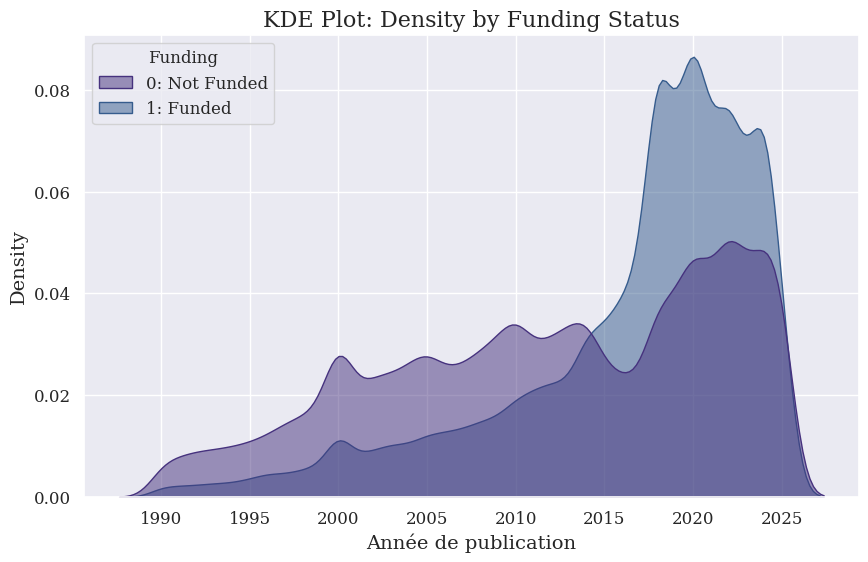

In [10]:
plt.figure(figsize=(10, 6))
ax = plt.gca() # Initialize the axis

sns.kdeplot(
    data=df, 
    x='year_numeric', 
    hue='Funding',
    fill=True,
    common_norm=False,
    alpha=0.5,
)

ax.set_title('KDE Plot: Density by Funding Status')
ax.set_xlabel('Année de publication')
ax.set_ylabel('Density')

plt.show()

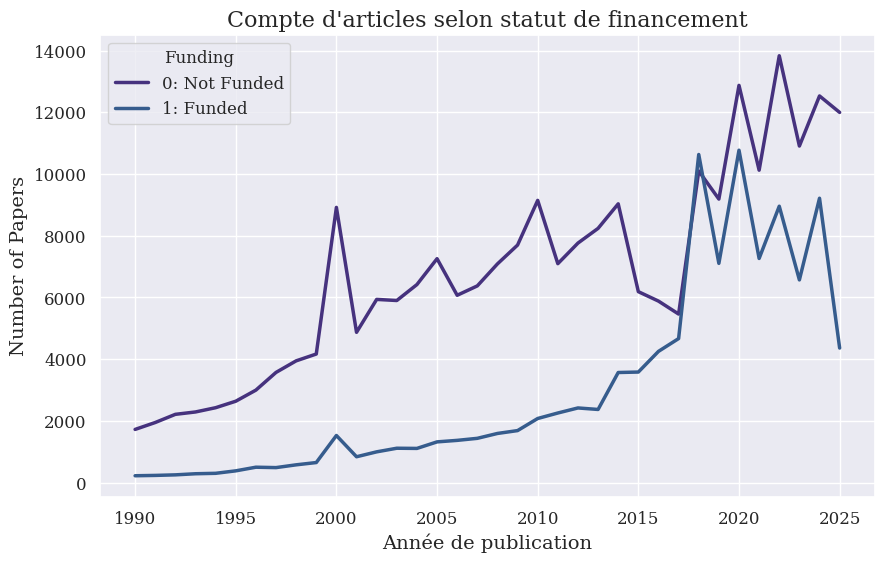

In [61]:
df_counts = df.groupby(['year_numeric', 'Funding']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
ax = plt.gca()

sns.lineplot(
    data=df_counts, 
    x='year_numeric', 
    y='count',
    hue='Funding',
    linewidth=2.5,
)

ax.set_title("Compte d'articles selon statut de financement")
ax.set_xlabel('Année de publication')
ax.set_ylabel('Number of Papers')

plt.show()

## 3. Transdisciplinarility studies funding

### 3. A. Densities

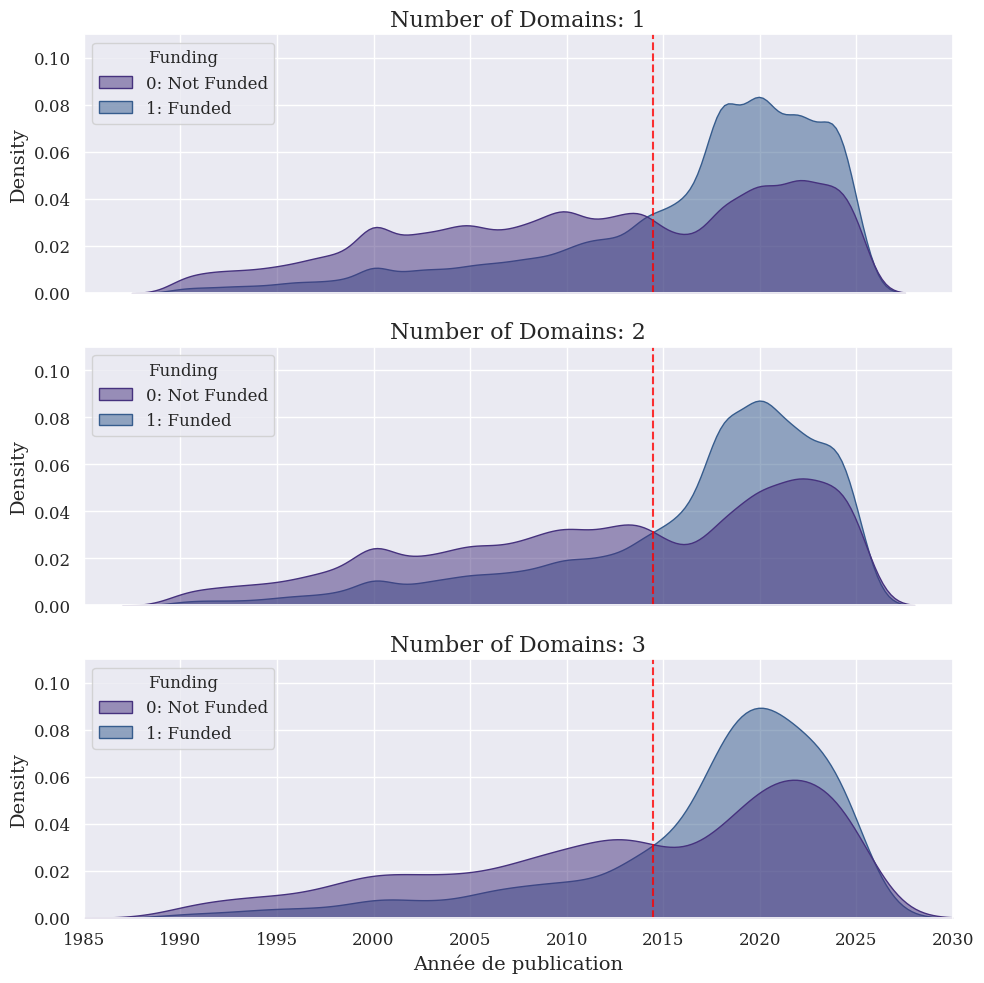

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True)

for i in range(3):
    subset = df[df['Number of Domains'] == i+1].copy()
    
    sns.kdeplot(
        data=subset, 
        x='year_numeric', 
        hue='Funding',
        fill=True,
        common_norm=False,
        alpha=0.5,
        ax=axes[i]
    )
    
    axes[i].set_ylim(0, 0.11)
    axes[i].set_xlim(1985, 2030)
    axes[i].axvline(x=2014.5, color='red', linestyle='--', alpha=0.8, linewidth=1.5)
    axes[i].set_title(f'Number of Domains: {i+1}')
    axes[i].set_ylabel('Density')

# Only set the x-label on the bottom plot to reduce clutter
axes[2].set_xlabel('Année de publication')

plt.tight_layout()
plt.show()

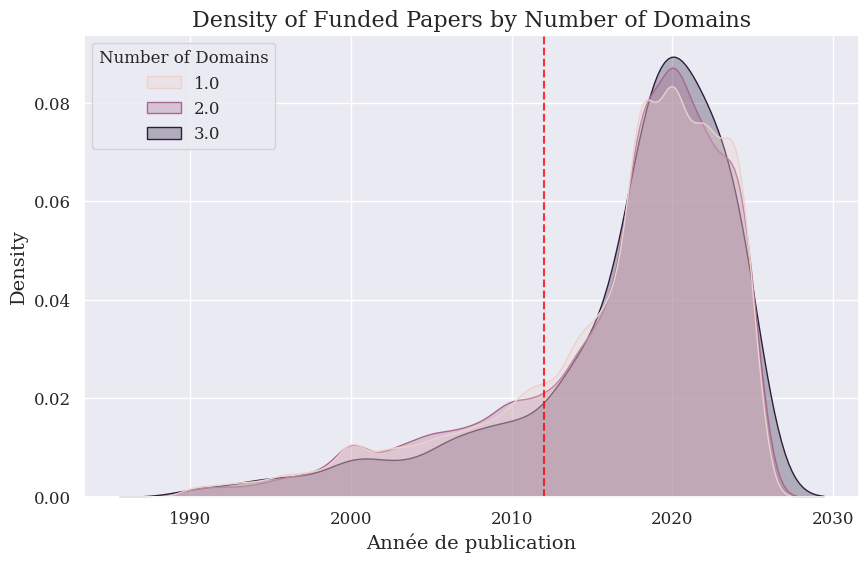

In [13]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=df_funded, 
    x='year_numeric', 
    hue='Number of Domains', 
    fill=True,
    common_norm=False,
    alpha=0.3)

plt.axvline(x=2012, color='red', linestyle='--', alpha=0.8, label='2012')
plt.title('Density of Funded Papers by Number of Domains')
plt.xlabel('Année de publication')
plt.ylabel('Density')

plt.show()

### 3. B. Counts

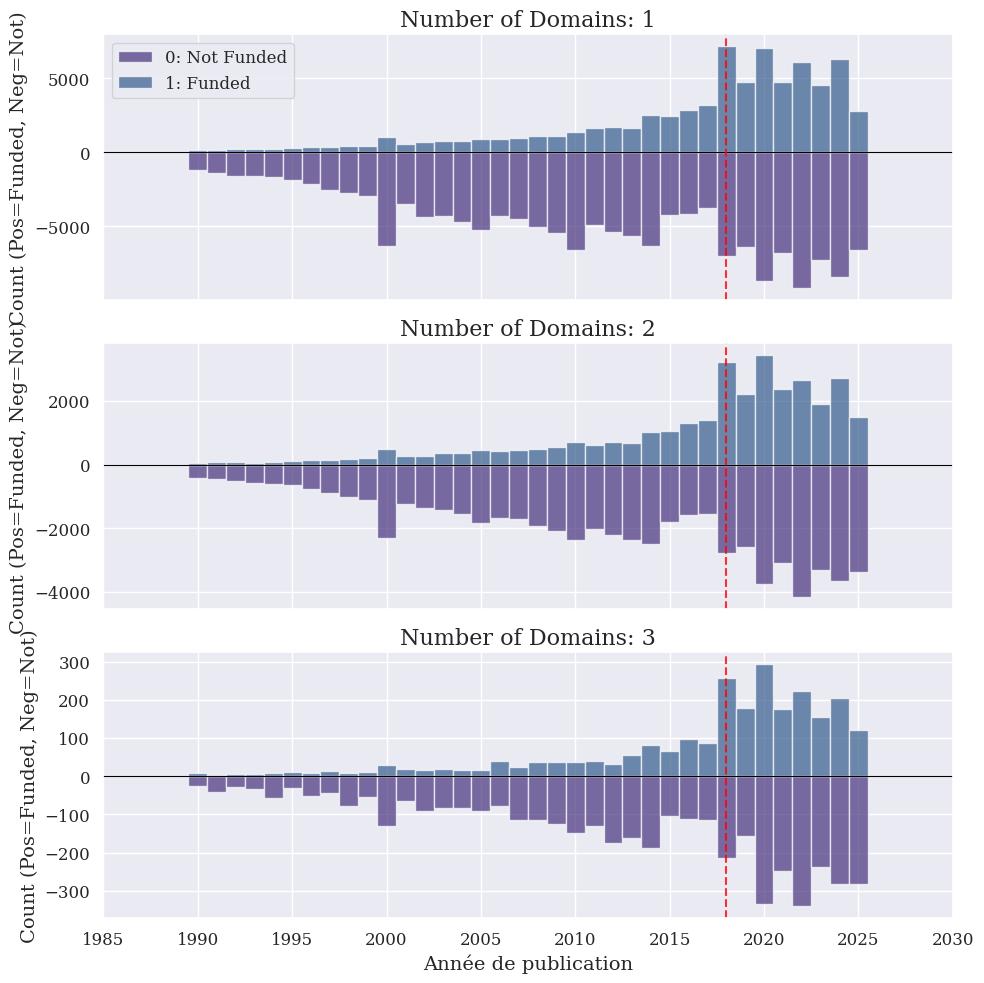

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True)

# Define colors for consistency (0=Funded, 1=Not Funded)
# using seaborn's default muted palette colors
colors = sns.color_palette("viridis")
color_funded = colors[0]
color_not_funded = colors[1]


for i in range(3):
    # Filter for the specific number of domains
    subset = df[df['Number of Domains'] == i+1].copy()
    
    # Group by year and funding status to get counts
    # unstack fills missing years/categories with 0
    counts = subset.groupby(['year_numeric', 'funders_bin']).size().unstack(fill_value=0)
    
    # Ensure both columns exist (in case a subset has only funded or only not-funded)
    if 0 not in counts.columns: counts[0] = 0
    if 1 not in counts.columns: counts[1] = 0
    
    # Prepare data for plotting
    years = counts.index
    funded_vals = counts[1]
    not_funded_vals = counts[0] * -1 # Make negative to plot downwards
    
    # Plotting using bar chart
    axes[i].bar(years, not_funded_vals, color=color_funded, label='0: Not Funded', width=1.0, alpha=0.7)
    axes[i].bar(years, funded_vals, color=color_not_funded, label='1: Funded', width=1.0, alpha=0.7)
    
    # Add the horizontal line at 0
    axes[i].axhline(0, color='black', linewidth=0.8)
    
    # Add the vertical line at 2014.5
    axes[i].axvline(x=2018, color='red', linestyle='--', alpha=0.8, linewidth=1.5)
    
    # Formatting
    axes[i].set_xlim(1985, 2030)
    axes[i].set_title(f'Number of Domains: {i+1}')
    axes[i].set_ylabel('Count (Pos=Funded, Neg=Not)')
    
    # Optional: If you want the y-axis labels to look positive on both sides (e.g., 10 instead of -10)
    # you can use a custom formatter, but usually standard labeling is clear enough for this chart type.

# Add legend only to the first plot to avoid clutter
axes[0].legend(loc='upper left')

# Only set the x-label on the bottom plot
axes[2].set_xlabel('Année de publication')

plt.tight_layout()
plt.show()

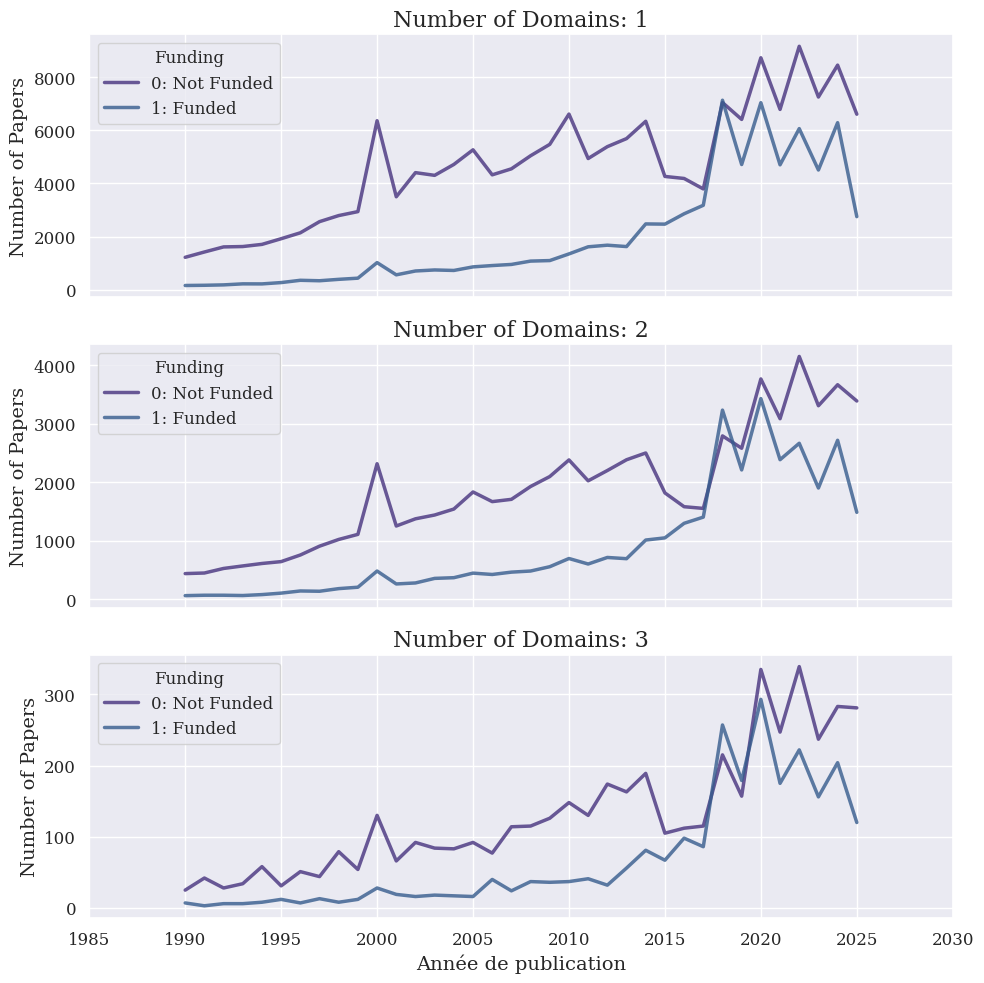

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True)

for i in range(1, 4):
    subset = df[df['Number of Domains'] == i].copy()
    subset_counts = subset.groupby(['year_numeric', 'Funding']).size().reset_index(name='count')
    
    sns.lineplot(
        data=subset_counts, 
        x='year_numeric', 
        y='count',
        hue='Funding',
        linewidth=2.5,
        alpha=0.8,
        ax=axes[i-1], 
    )
    
    axes[i-1].set_xlim(1985, 2030)
    axes[i-1].set_title(f'Number of Domains: {i}')
    axes[i-1].set_ylabel('Number of Papers')

axes[2].set_xlabel('Année de publication')

plt.tight_layout()
plt.show()

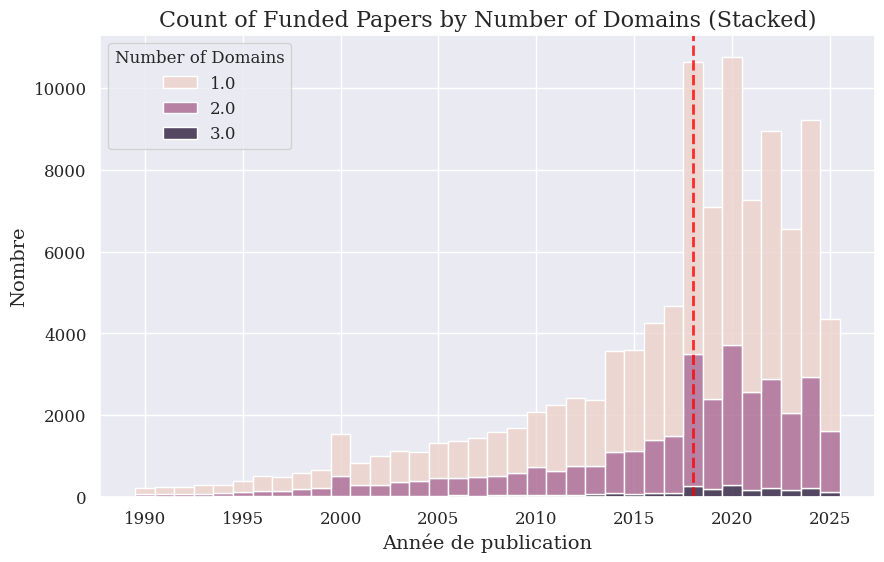

In [16]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=df_funded, 
    x='year_numeric', 
    hue='Number of Domains', 
    multiple='stack',
    discrete=True,
    edgecolor='white',
    alpha=0.8
)

plt.axvline(x=2018, color='red', linestyle='--', alpha=0.8, label='2012', linewidth=2)

plt.title('Count of Funded Papers by Number of Domains (Stacked)')
plt.xlabel('Année de publication')
plt.ylabel('Nombre')

plt.show()

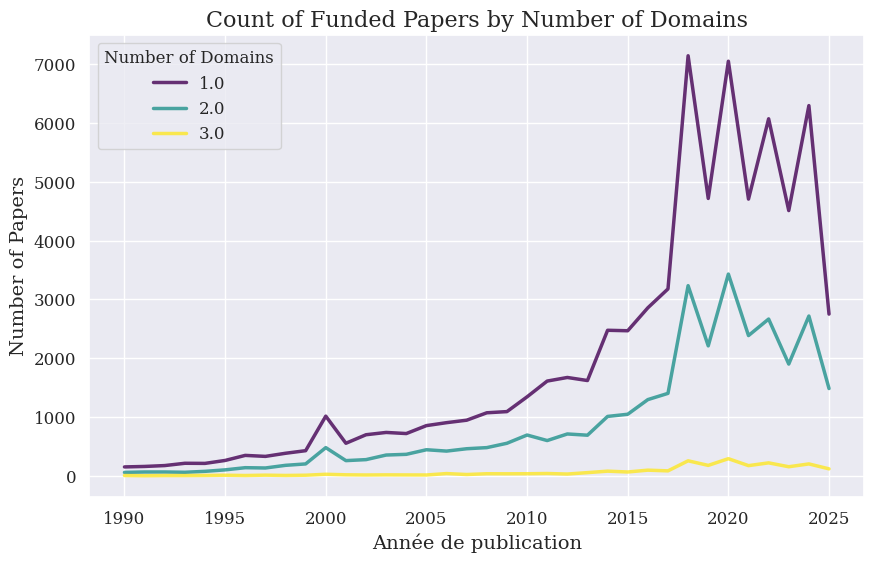

In [17]:
df_counts_funded = df_funded.groupby(['year_numeric', 'Number of Domains']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
ax = plt.gca()

sns.lineplot(
    data=df_counts_funded, 
    x='year_numeric', 
    y='count',
    hue='Number of Domains', # Each domain count gets its own colored line
    palette="viridis",
    linewidth=2.5,
    alpha=0.8,
)

plt.title('Count of Funded Papers by Number of Domains')
plt.xlabel('Année de publication')
plt.ylabel('Number of Papers')
plt.legend(title='Number of Domains')

plt.show()

### 3. C. Proportions

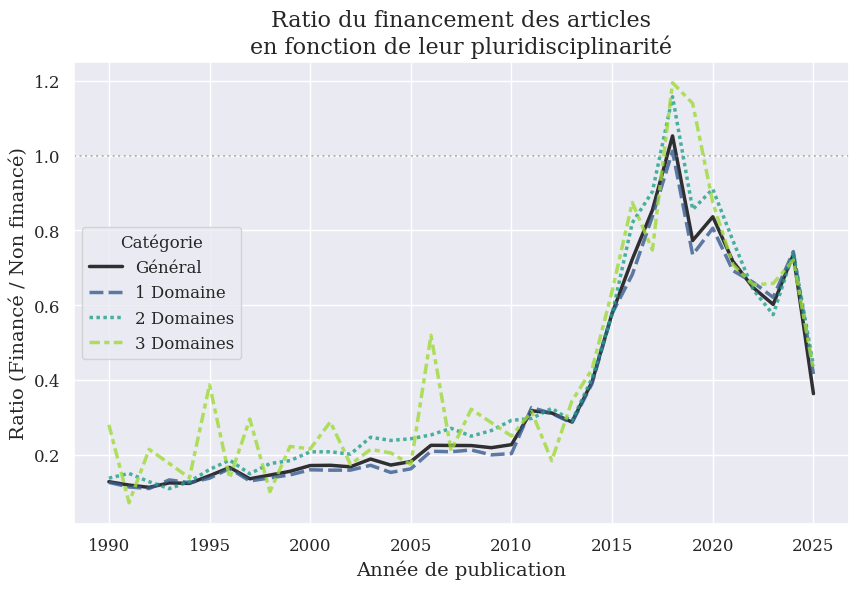

In [18]:
def get_ratios(data, label_col=None, label_val=None):
    # Group by Year and Funding Status (0=Funded, 1=Not Funded)
    counts = data.groupby(['year_numeric', 'funders_bin']).size().unstack(fill_value=0)
    
    # Calculate Ratio: Funded (0) / Not Funded (1)
    # Handling potential division by zero if a year has 0 non-funded papers
    counts['ratio'] = counts[1] / counts[0].replace(0, float('nan'))
    
    # Add a label column for the plot legend
    if label_col:
        counts['Catégorie'] = label_val
    else:
        counts['Catégorie'] = 'Général'
        
    return counts[['ratio', 'Catégorie']].reset_index()

# 2. Calculate "General" Ratio (All data)
df_general_ratio = get_ratios(df)

# 3. Calculate Ratios for Domains 1, 2, and 3
domain_ratios = []
for d in [1, 2, 3]:
    subset = df[df['Number of Domains'] == d]
    if d==1 :
        ratios = get_ratios(subset, label_col=True, label_val=f'{d} Domaine')
    else :
        ratios = get_ratios(subset, label_col=True, label_val=f'{d} Domaines')
    domain_ratios.append(ratios)

# Combine all dataframes
plot_data = pd.concat([df_general_ratio] + domain_ratios)

# 4. Define Colors
# specific map: General -> Red, Domains -> Viridis colors
viridis_colors = sns.color_palette('viridis',n_colors=6)
palette = {
    'Général': 'black',
    '1 Domaine': viridis_colors[1],
    '2 Domaines': viridis_colors[3],
    '3 Domaines': viridis_colors[5]
}

# 5. Plotting
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=plot_data,
    x='year_numeric',
    y='ratio',
    hue='Catégorie',
    palette=palette,
    style='Catégorie',
    linewidth=2.5,
    alpha=0.8
)

# Customization
plt.title('Ratio du financement des articles\nen fonction de leur pluridisciplinarité')
plt.ylabel('Ratio (Financé / Non financé)')
plt.xlabel('Année de publication')
plt.axhline(1, color='gray', linestyle=':', alpha=0.5, label='Ratio égal (1:1)') # Reference line

plt.show()

## 4. Field specific fundings

In [19]:
def get_yearly_ratios(subset_df, label):
    # 1. Group by Year and Funding Status
    counts = subset_df.groupby(['year_numeric', 'funders_bin']).size().unstack(fill_value=0)
    
    # 2. Ensure columns 0 (Funded) and 1 (Not Funded) exist to prevent errors
    if 0 not in counts.columns: counts[0] = 0
    if 1 not in counts.columns: counts[1] = 0
    
    # 3. Calculate Total Papers per year
    counts['Total'] = counts[0] + counts[1]
    
    # 4. FILTER: Remove years where Total papers is 0 (or very low, e.g., < 5 if you want robustness)
    # This prevents plotting points for years with "no paper"
    counts = counts[counts['Total'] > 0].copy()
    
    # Replace 0 denominator with NaN to avoid infinity, and calculate ratio
    counts['ratio'] = counts[1] / counts[0].replace(0, float('nan'))
    
    counts['Catégorie'] = label
    return counts[['ratio', 'Catégorie']].reset_index()

In [20]:
# --- Main Plotting Function ---
def plot_field_ratios(df, field_list, list_name):
    """
    Plots the funding ratio evolution for a specific list of fields vs. All Others.
    
    Parameters:
    - df: The main dataframe containing 'year_numeric', 'funders_bin', and field columns.
    - field_list: List of column names (strings) for the specific fields.
    - list_name: Title string for the plot.
    """
    
    # 1. Calculate "Tous les autres" Baseline
    # "Tous les autres" = Papers that are NOT in ANY of the fields in the current list
    is_in_list = df[field_list].any(axis=1)
    df_others = df[~is_in_list]
    
    # Check if df_others is not empty
    if df_others.empty:
        print(f"Warning: No 'Other' papers found for {list_name}. Baseline skipped.")
        list_of_dfs = []
    else:
        df_ratios_others = get_yearly_ratios(df_others, 'Tous les autres')
        list_of_dfs = [df_ratios_others]

    # 2. Calculate Ratios for each specific field in the list
    for field in field_list:
        # Check if field exists in DF to avoid errors
        if field not in df.columns:
            print(f"Skipping {field} (not found in DataFrame)")
            continue
            
        # Get papers belonging to this field
        subset = df[df[field] == 1]
        
        if subset.empty:
            continue
            
        # Create readable label
        label = field.replace('field_', '').replace('_', ' ').title()
        
        # Calculate and store
        df_ratios_field = get_yearly_ratios(subset, label)
        list_of_dfs.append(df_ratios_field)

    # 3. Combine Data
    if not list_of_dfs:
        print(f"No data to plot for {list_name}")
        return

    plot_data = pd.concat(list_of_dfs, ignore_index=True)
    
    # 4. Setup Styling (Consistent with previous request)
    unique_cats = plot_data['Catégorie'].unique()
    
    # Colors: Black for 'Tous les autres', Standard Palette for specific fields
    colors = sns.color_palette("tab10", len(unique_cats))
    palette_dict = dict(zip(unique_cats, colors))
    palette_dict['Tous les autres'] = 'black'
    
    # Dashes: Solid ("") for 'Tous les autres', Dashed (2, 2) for specific fields
    # (Or flip this if you prefer the previous style)
    dashes_map = {cat: "" if cat == 'Tous les autres' else (2, 2) for cat in unique_cats}

    # 5. Plotting
    plt.figure(figsize=(12, 7))
    
    sns.lineplot(
        data=plot_data,
        x='year_numeric',
        y='ratio',
        hue='Catégorie',
        palette=palette_dict,
        style='Catégorie',
        dashes=dashes_map,
        linewidth=2.5,
        alpha=0.9,
    )
    
    # Formatting
    plt.axhline(1, color='gray', linestyle=':', alpha=0.5, label='Ratio égal (1:1)')
    plt.title(f'Ratio de financement : {list_name} vs Autres')
    plt.xlabel('Année de publication')
    plt.ylabel('Ratio (Financé / Non financé)')
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Domaines')
    
    plt.tight_layout()
    plt.show()

In [21]:
def plot_field_counts_panel(df, field_list, list_name):
    """
    Creates a panel (grid) of stacked bar plots showing the number of papers
    per year for each field in the list.
    """
    # 1. Prepare Data: Subset only necessary columns
    # We need year, funding status, and the specific field columns
    cols_to_keep = ['year_numeric', 'funders_bin'] + [f for f in field_list if f in df.columns]
    
    if len(cols_to_keep) < 3: # If no fields found
        return

    temp_df = df[cols_to_keep].copy()
    
    # 2. Melt to Long Format
    # This transforms the "wide" field columns into a single "Field" column
    df_melted = temp_df.melt(
        id_vars=['year_numeric', 'funders_bin'], 
        var_name='Field_Raw', 
        value_name='Is_Present'
    )
    
    # Filter: Keep only rows where the paper belongs to the field
    df_melted = df_melted[df_melted['Is_Present'] == 1].copy()
    
    if df_melted.empty:
        print(f"No count data for {list_name}")
        return

    # 3. Clean Labels for Plotting
    df_melted['Domaine'] = df_melted['Field_Raw'].str.replace('field_', '').str.replace('_', ' ').str.title()
    
    # Map Funding: 1=Funded, 0=Not Funded (per your logic)
    df_melted['Statut de financement'] = df_melted['funders_bin'].map({1: 'Financé', 0: 'Non financé'})

    # 4. Create the Panel Plot (Displot)
    # Kind='hist' with discrete=True behaves exactly like a bar plot for years
    g = sns.displot(
        data=df_melted,
        x='year_numeric',
        hue='Statut de financement',
        col='Domaine',         # Create a subplot for each Field
        col_wrap=3,          # limit to 3 columns wide
        multiple='stack',    # Stack Funded on top of Not Funded
        palette={'Financé': 'tab:pink', 'Non financé': 'tab:orange'},
        discrete=True,       # Ensures one bar per year
        height=4, 
        aspect=1.5,
        facet_kws={'sharey': False}
    )
    
    # 5. Final Adjustments
    g.fig.suptitle(f'Nombre annuel de publications : {list_name}', y=1.02)
    g.set_axis_labels("Année de publication", "Nombre")
    
    # Rotate x-labels if they are too crowded
    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(45)

    plt.show()

### 4. A. AI fields

In [22]:
ai_fields = [
    'field_artificial_intelligence',
    'field_computer_vision_and_pattern_recognition',
    'field_theoretical_computer_science'
]

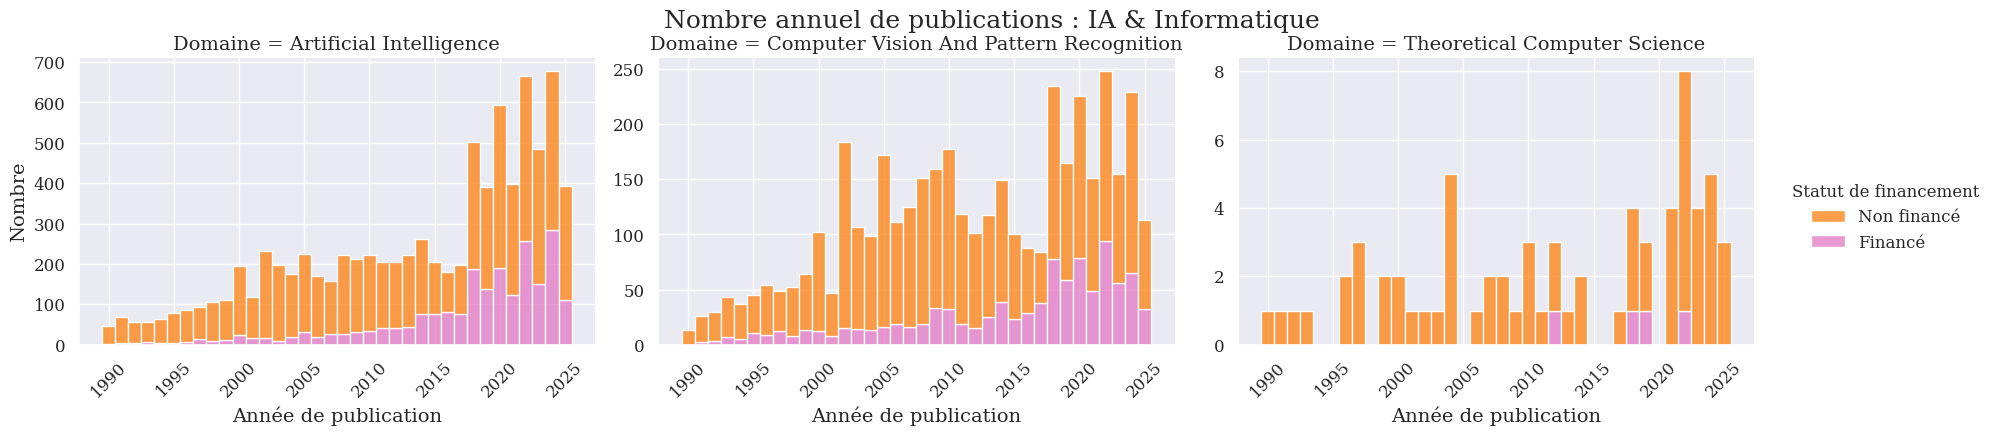

In [23]:
plot_field_counts_panel(df, ai_fields, "IA & Informatique")

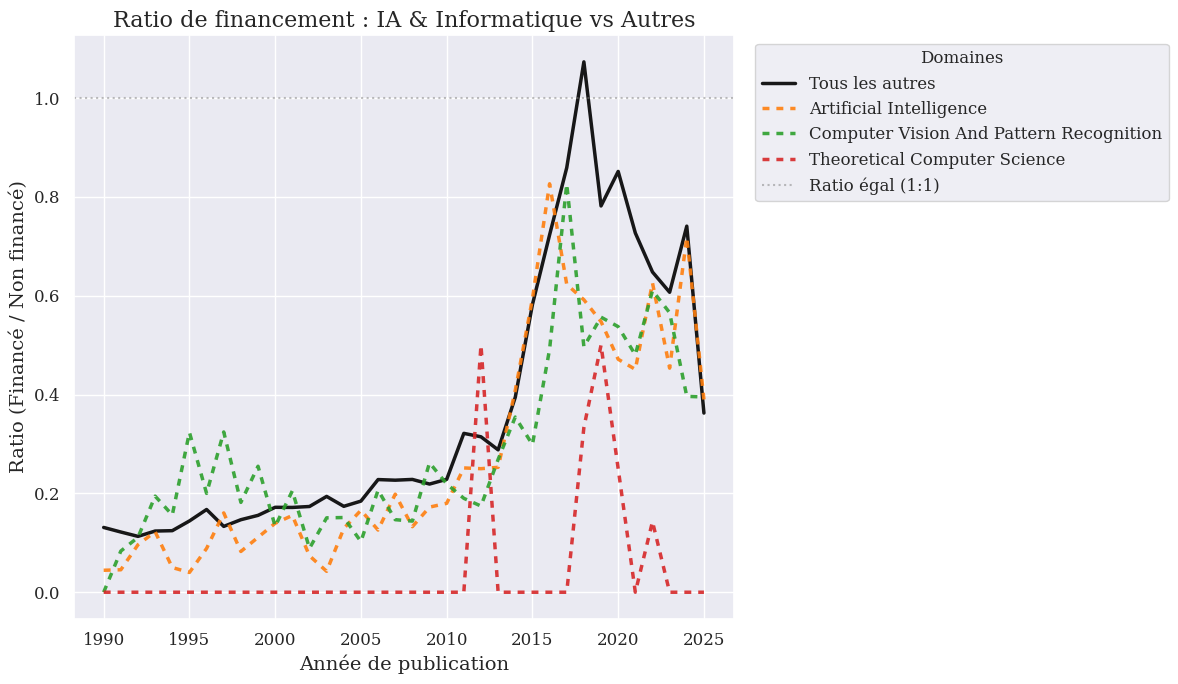

In [24]:
plot_field_ratios(df, ai_fields, "IA & Informatique")

### 4. B. Biotech fields

In [25]:
biotech_fields = [
    'field_applied_microbiology_and_biotechnology',
    'field_bioengineering',
    'field_biomaterials',
    'field_biomedical_engineering',
    'field_biotechnology',
    'field_molecular_medicine'
]

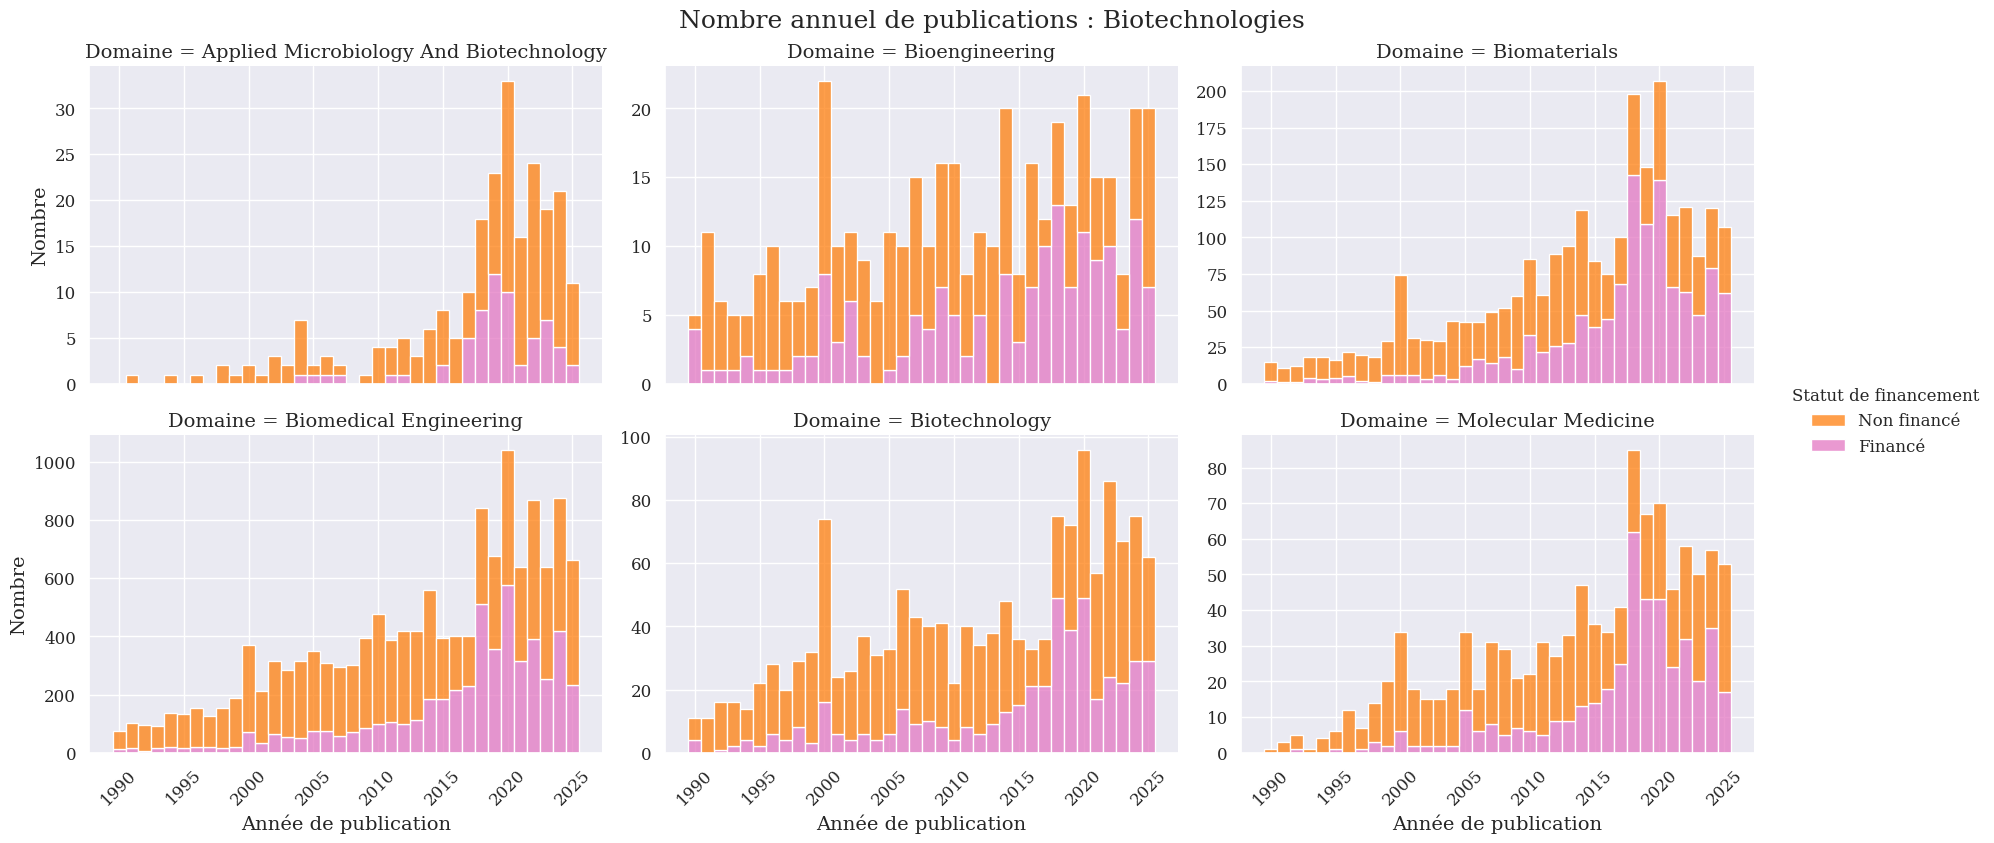

In [26]:
plot_field_counts_panel(df, biotech_fields, "Biotechnologies")

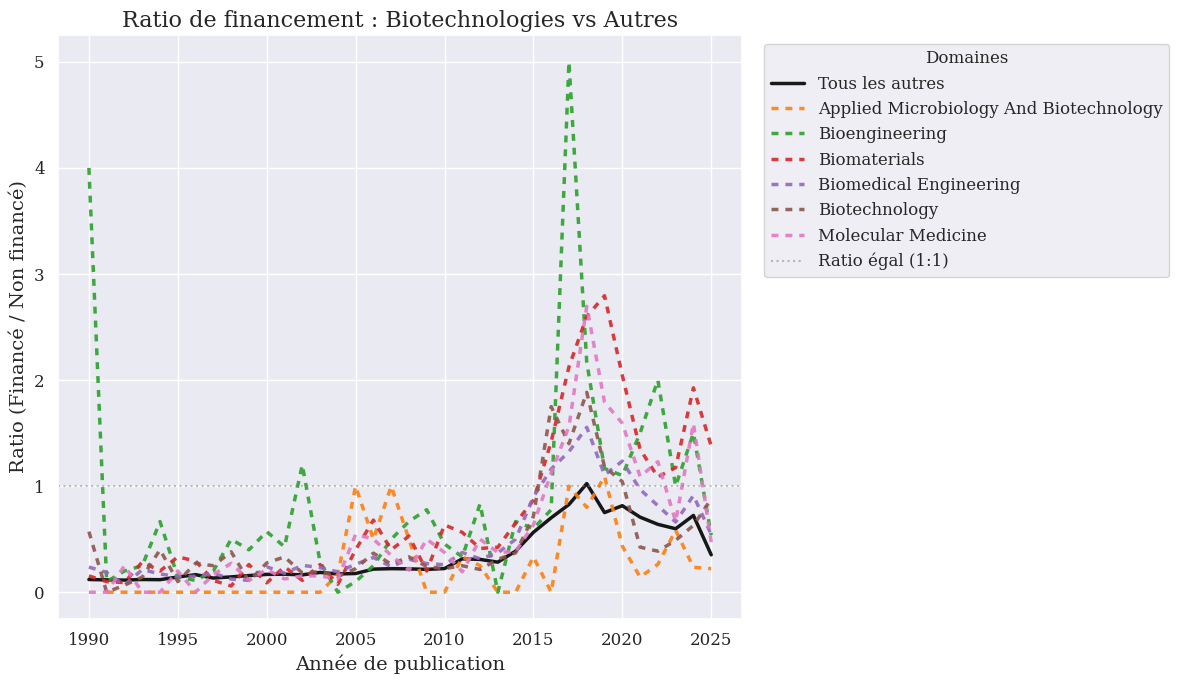

In [27]:
plot_field_ratios(df, biotech_fields, "Biotechnologies")

### 4. C. Fun physics fields

In [28]:
fundamental_physics_fields = [
    'field_astronomy_and_astrophysics',
    'field_atomic_and_molecular_physics_and_optics',
    'field_condensed_matter_physics',
    'field_mathematical_physics',
    'field_nuclear_and_high_energy_physics',
    'field_space_and_planetary_science',
    'field_statistical_and_nonlinear_physics'
]

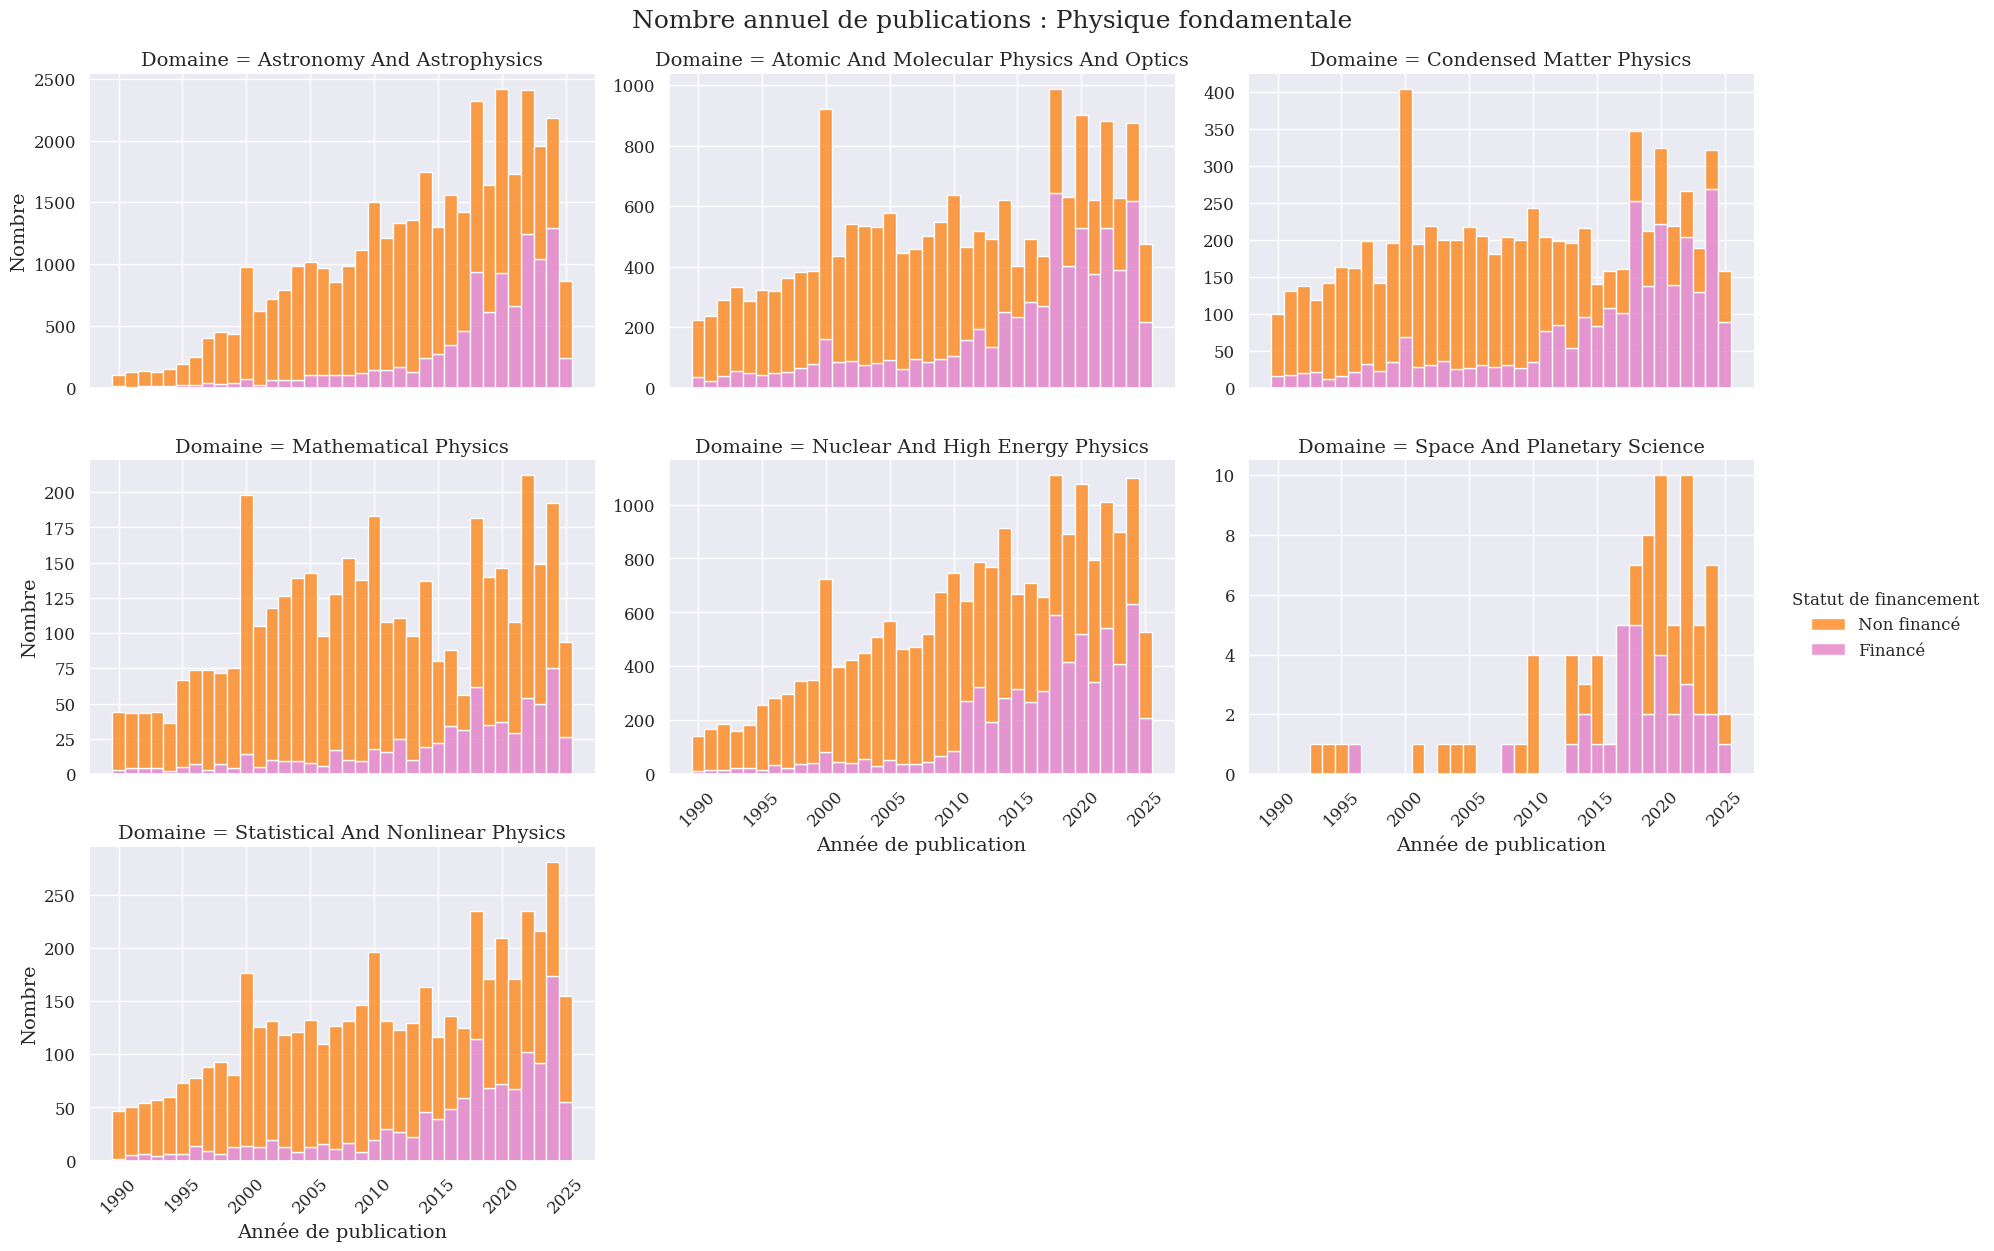

In [29]:
plot_field_counts_panel(df, fundamental_physics_fields, "Physique fondamentale")

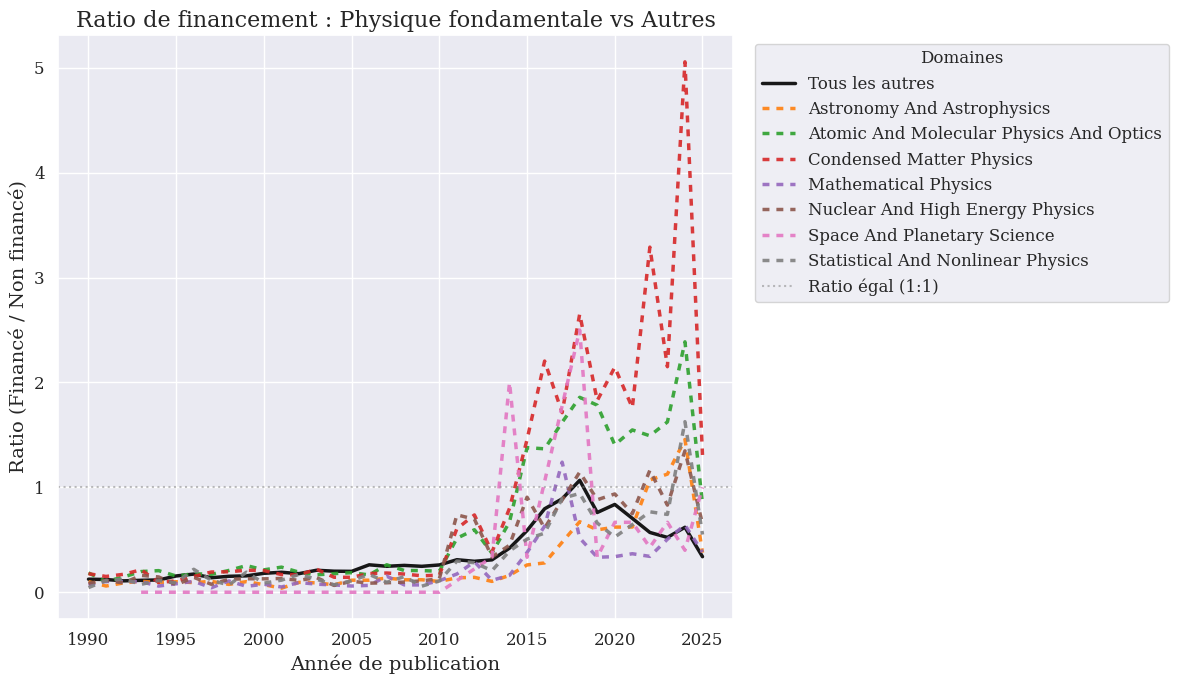

In [30]:
plot_field_ratios(df, fundamental_physics_fields, "Physique fondamentale")

### 4. D. Environmental sciences fields

In [31]:
environmental_sciences_fields = [
    'field_ecological_modeling',
    'field_ecology',
    'field_ecology_evolution_behavior_and_systematics',
    'field_energy_engineering_and_power_technology',
    'field_environmental_chemistry',
    'field_environmental_engineering',
    'field_global_and_planetary_change',
    'field_nature_and_landscape_conservation',
    'field_pollution',
    'field_renewable_energy_sustainability_and_the_environment',
    'field_water_science_and_technology'
]

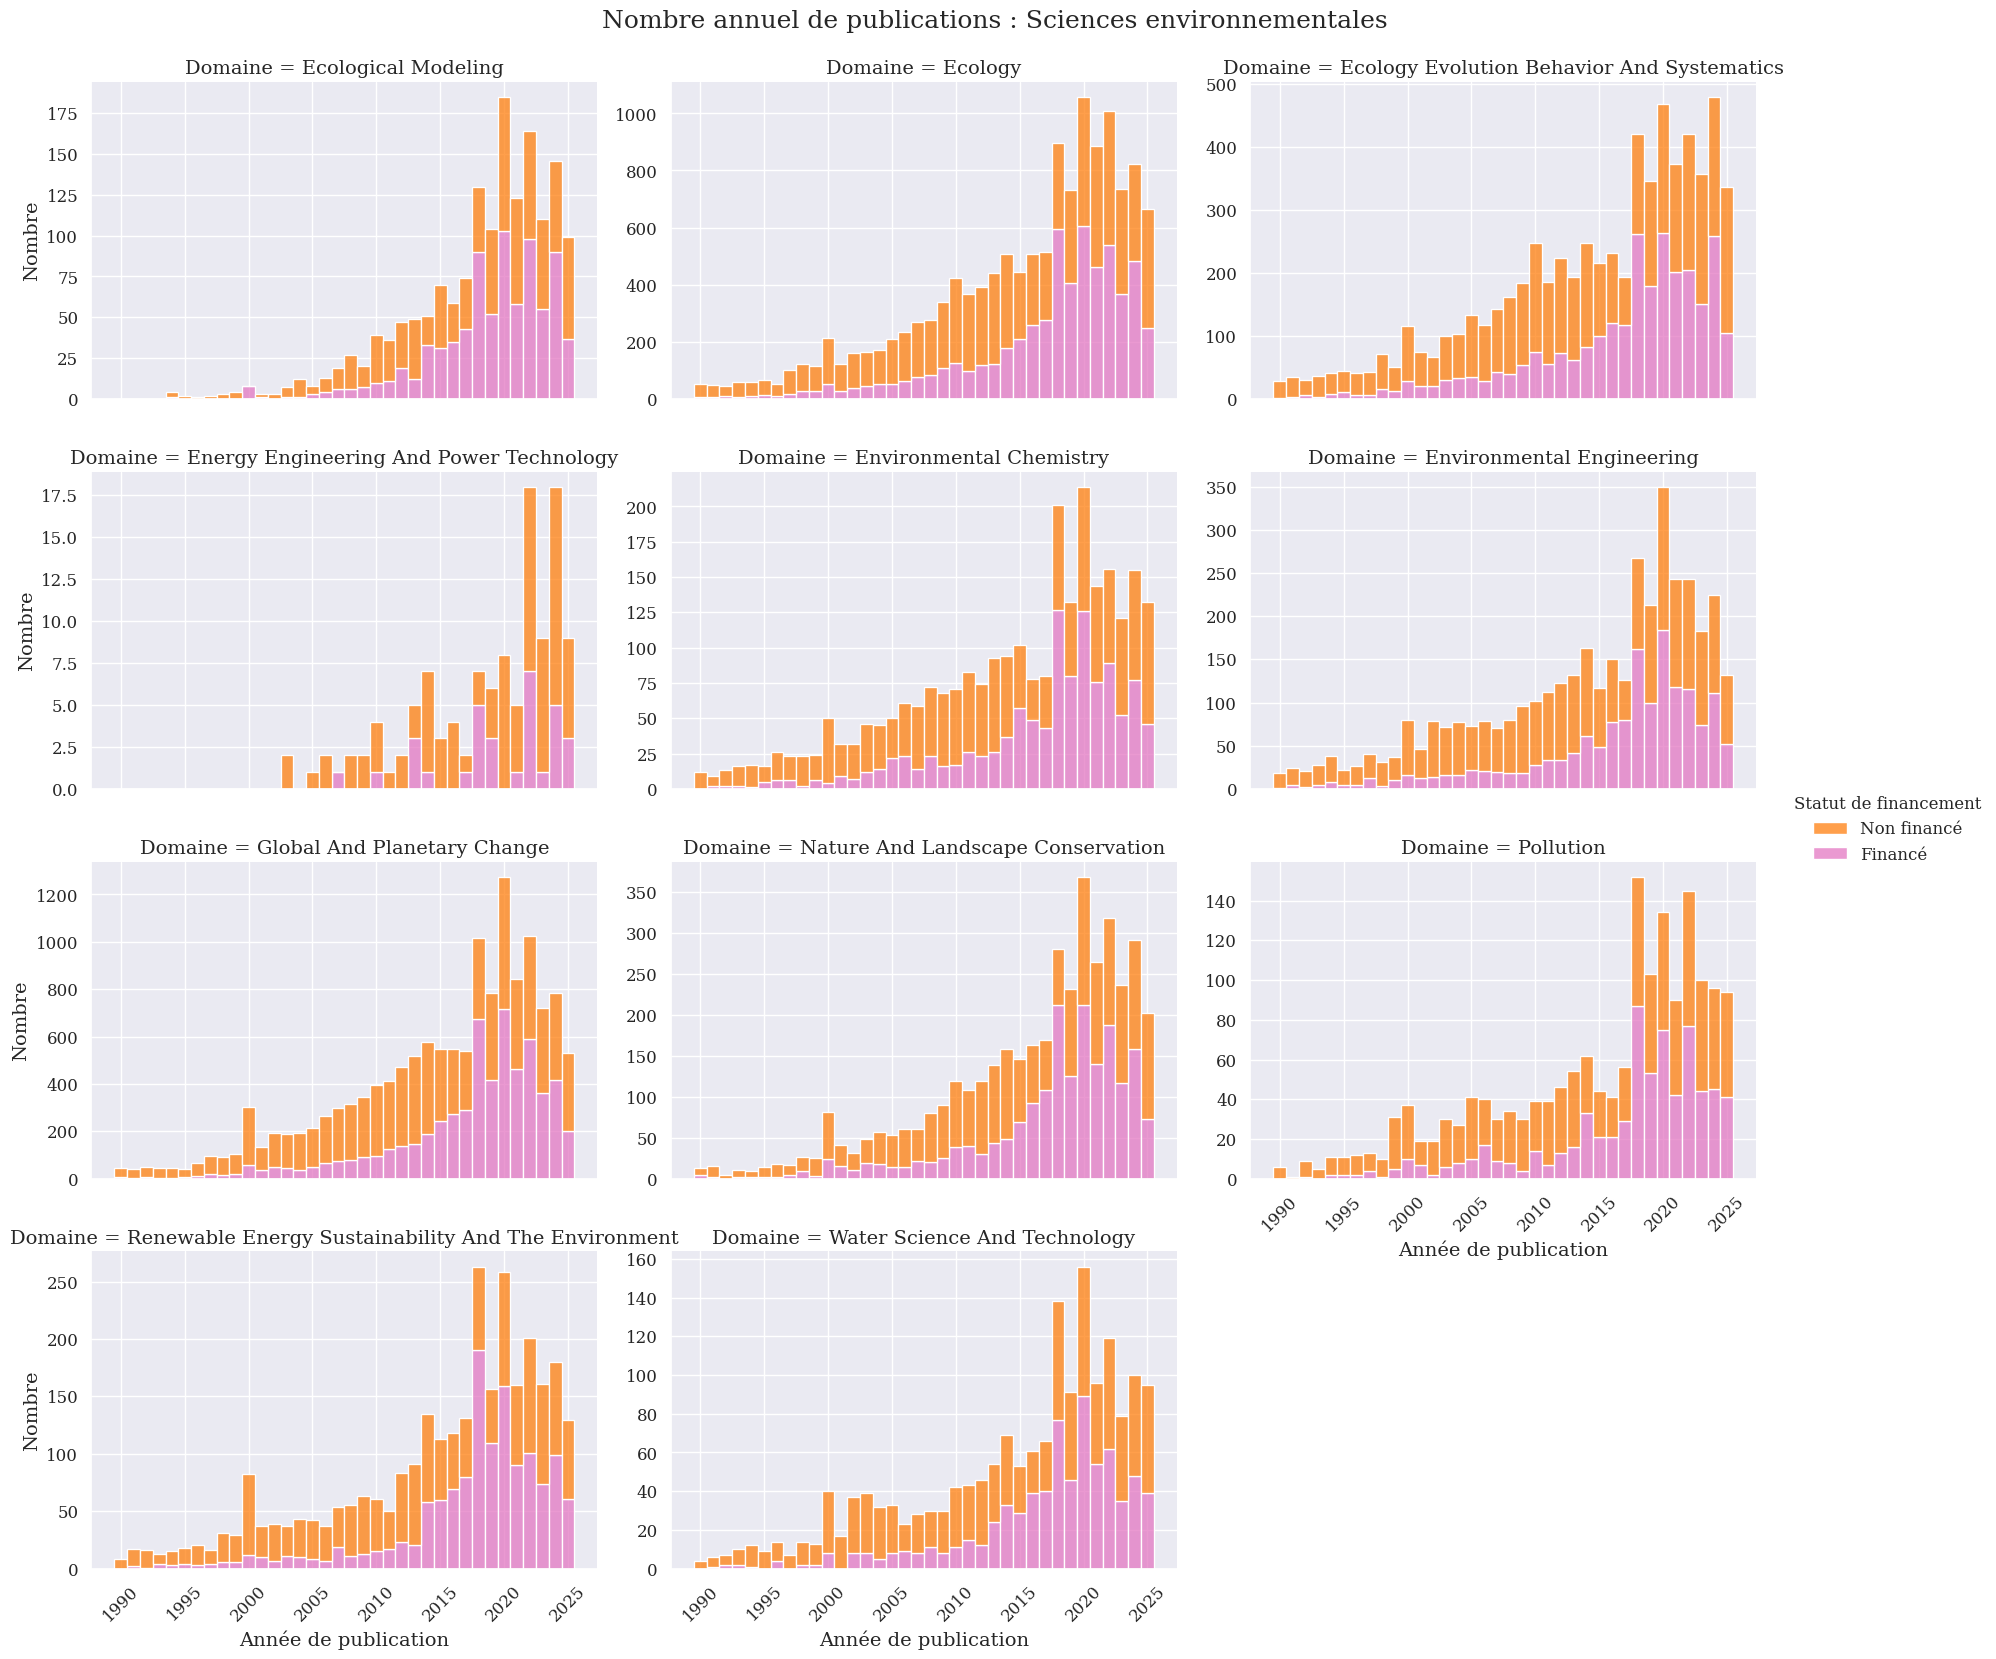

In [32]:
plot_field_counts_panel(df, environmental_sciences_fields, "Sciences environnementales")

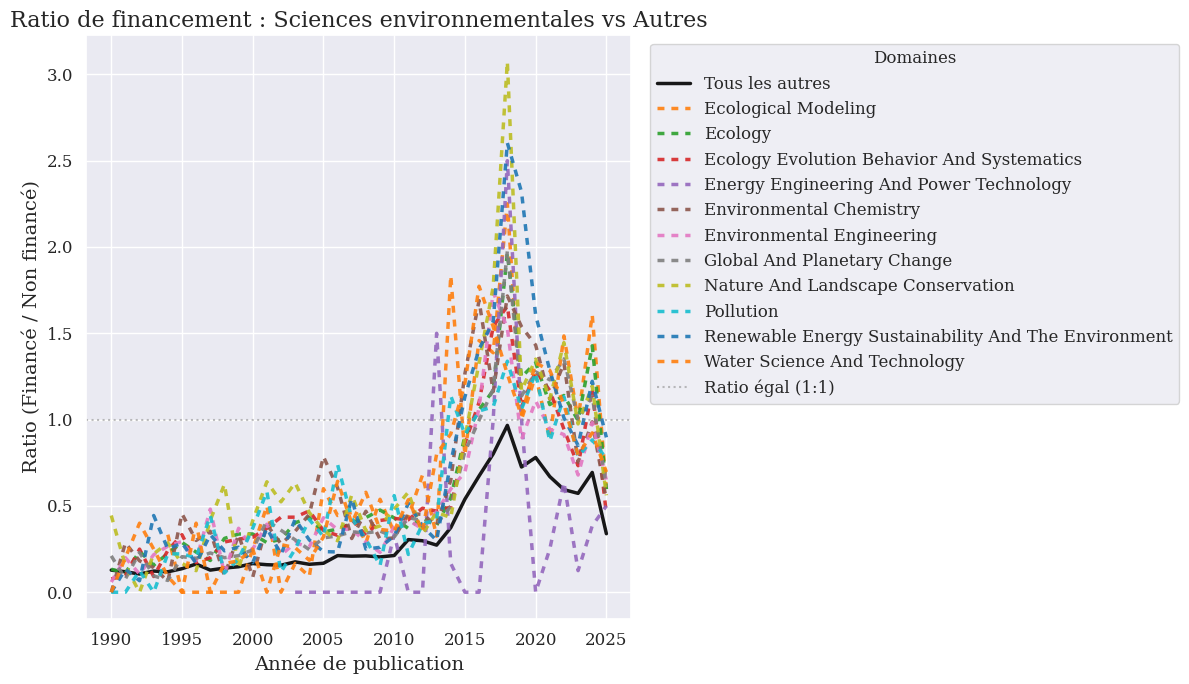

In [33]:
plot_field_ratios(df, environmental_sciences_fields, "Sciences environnementales")

### 4. E. Interdisciplinary fields

In [34]:
interdisciplinary_fields = [
    'field_health_informatics',
    'field_human-computer_interaction',
    'field_management_of_technology_and_innovation'
]

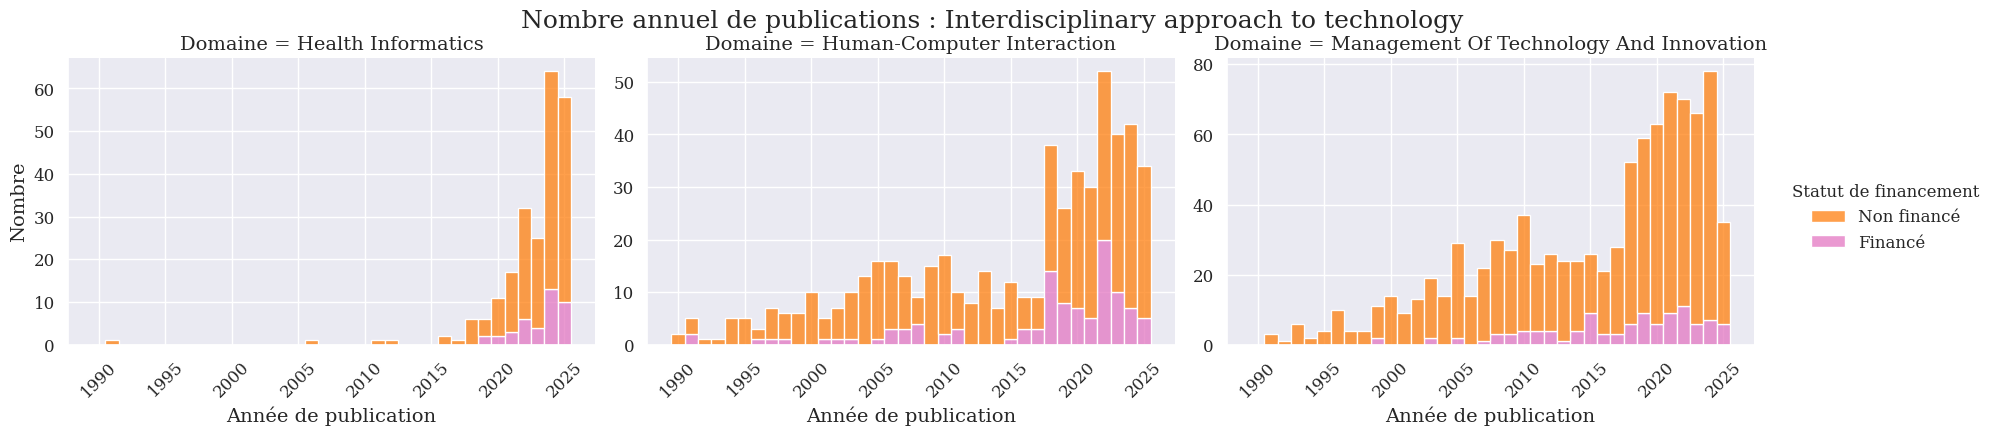

In [35]:
plot_field_counts_panel(df, interdisciplinary_fields, "Interdisciplinary approach to technology")

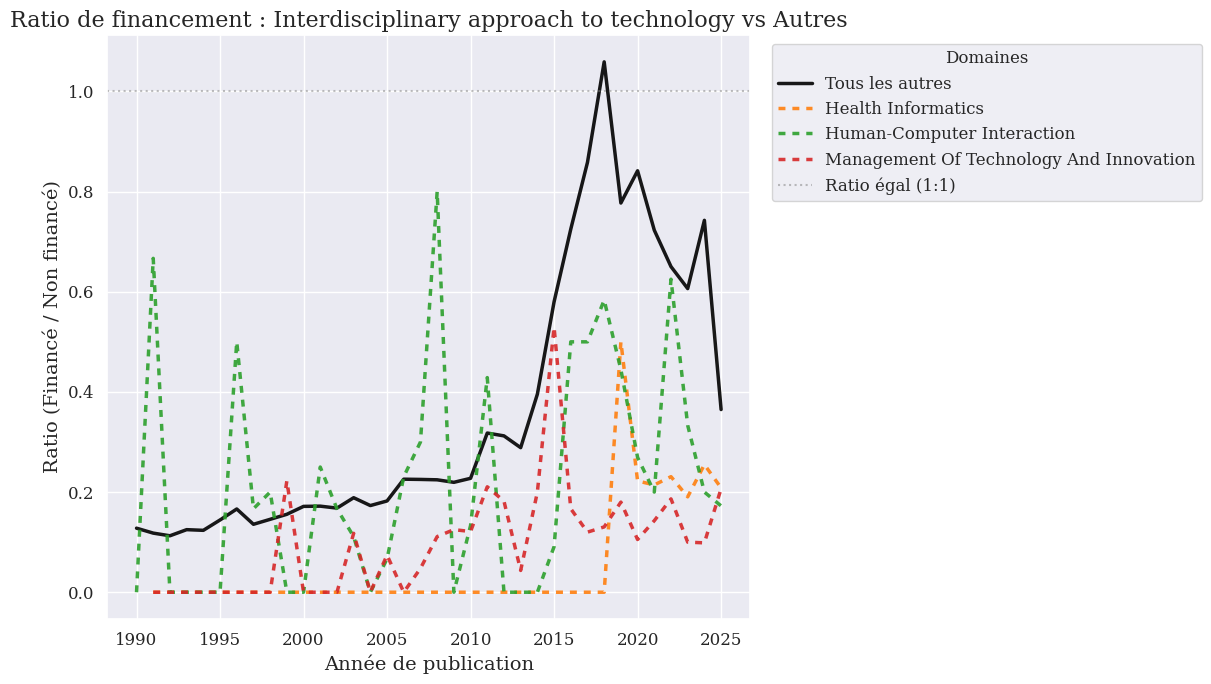

In [36]:
plot_field_ratios(df, interdisciplinary_fields, "Interdisciplinary approach to technology")

### 4. F. GLOBAL SPECIFIC FIELDS

In [37]:
lists_to_plot = {
    "IA & Informatique": ai_fields,
    "Biotechnologies": biotech_fields,
    "Physique fondamentale": fundamental_physics_fields,
    "Sciences environnementales": environmental_sciences_fields,
    "Interdisciplinary approach to technology": interdisciplinary_fields
}

In [38]:
# --- Helper Function (Same as before) ---
def get_yearly_ratios(subset_df, label, all_years):
    # Group by Year and Funding Status
    counts = subset_df.groupby(['year_numeric', 'funders_bin']).size().unstack(fill_value=0)
    
    # Reindex to ensure continuous timeline
    counts = counts.reindex(all_years)
    
    # Ensure columns 0 (Not Funded) and 1 (Funded) exist
    if 0 not in counts.columns: counts[0] = 0
    if 1 not in counts.columns: counts[1] = 0
    
    # Calculate Ratio: Funded (1) / Not Funded (0)
    numerator = counts[1]
    denominator = counts[0]
    
    # Avoid infinity and handle missing years
    counts['ratio'] = numerator / denominator.replace(0, float('nan'))
    counts['Catégorie'] = label
    
    return counts[['ratio', 'Catégorie']].reset_index().rename(columns={'index': 'year_numeric'})

def plot_all_lists_comparison(df, lists_dict):
    """
    Plots a comparison line chart for:
    1. Global Average (All data)
    2. Other fields (Data not in any list)
    3. Each specific list in lists_dict
    """
    
    # Define full timeline
    full_year_range = range(int(df['year_numeric'].min()), int(df['year_numeric'].max()) + 1)
    
    plot_data_list = []

    # 1. Global Average
    df_global = get_yearly_ratios(df, 'Moyenne mondiale', full_year_range)
    plot_data_list.append(df_global)

    # 2. "Autres domaines" Baseline
    # Collect ALL fields from ALL lists to find what is excluded
    all_list_fields = set()
    for fields in lists_dict.values():
        all_list_fields.update(fields)
    
    valid_list_fields = [f for f in all_list_fields if f in df.columns]
    
    if valid_list_fields:
        # Mask: True if paper is in ANY of the specific lists
        is_in_any_list = df[valid_list_fields].fillna(0).any(axis=1)
        # "Autres domaines" = Papers NOT in that mask
        df_others = df[~is_in_any_list]
        
        if not df_others.empty:
            df_ratios_others = get_yearly_ratios(df_others, 'Autres domaines', full_year_range)
            plot_data_list.append(df_ratios_others)

    # 3. Specific Lists
    for list_name, field_list in lists_dict.items():
        # Filter for fields that exist in DF
        valid_fields = [f for f in field_list if f in df.columns]
        if not valid_fields: continue
            
        # Papers belonging to this specific list
        is_in_list = df[valid_fields].fillna(0).any(axis=1)
        subset = df[is_in_list]
        
        if subset.empty: continue
            
        df_ratios_list = get_yearly_ratios(subset, list_name, full_year_range)
        plot_data_list.append(df_ratios_list)

    # 4. Combine Data
    final_plot_data = pd.concat(plot_data_list, ignore_index=True)

    # 5. Styling Setup
    categories = final_plot_data['Catégorie'].unique()
    
    # Create colors: Use a vivid palette for your lists
    # We remove 'Moyenne mondiale' and 'Autres domaines' to assign them manually later
    list_cats = [c for c in categories if c not in ['Moyenne mondiale', 'Autres domaines']]
    colors = sns.color_palette("tab10", len(list_cats))
    
    palette = dict(zip(list_cats, colors))
    palette['Moyenne mondiale'] = 'black'
    palette['Autres domaines'] = 'grey'
    
    # Define Line Styles (Dashes)
    # Solid for lists, Thick Solid for Global, Dashed for Other
    dashes = {cat: "" for cat in list_cats} # Solid lines for lists
    dashes['Moyenne mondiale'] = ""           # Solid for Global
    dashes['Autres domaines'] = (2, 2)         # Dashed for Others
    
    # Define Line Widths (using 'size')
    sizes = {cat: 2.5 for cat in list_cats}
    sizes['Moyenne mondiale'] = 4.0  # Thicker line for Global
    sizes['Autres domaines'] = 2.0    # Thinner for Others

    # 6. Plotting
    plt.figure(figsize=(14, 8))
    
    sns.lineplot(
        data=final_plot_data,
        x='year_numeric',
        y='ratio',
        hue='Catégorie',
        palette=palette,
        style='Catégorie',
        dashes=dashes,
        size='Catégorie',
        sizes=sizes,
        alpha=0.9
    )
    
    plt.axhline(1, color='gray', linestyle=':', alpha=0.5, label='Ratio égal (1:1)')
    plt.title('Évolution du ratio de financement\nau cours du temps et selon les domaines')
    plt.xlabel('Année de publication')
    plt.ylabel("Ratio (Nbr d'articles financés / Nbr d'articles non financés)")
    
    # Legend placement
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='Domaines')
    
    plt.tight_layout()
    plt.show()

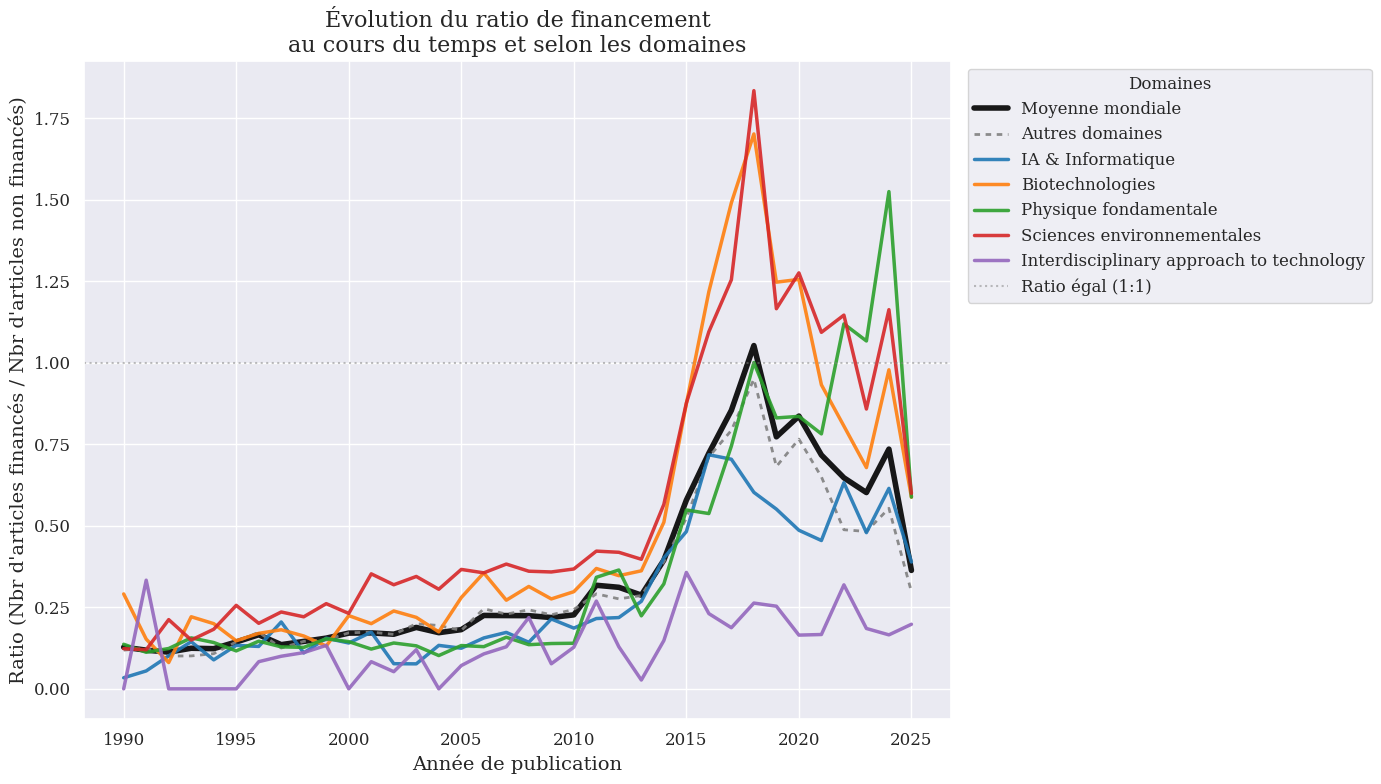

In [39]:
plot_all_lists_comparison(df, lists_to_plot)

## 5. Private and public funding

### 5. A. Data import

In [40]:
df_inst = pd.read_csv('institutions_publics_privees.csv')

In [41]:
df_inst.head(4)

institution_name           pays  \
0                                            3M  United States   
1                        A-T Children's Project  United States   
2  A. Alfred Taubman Medical Research Institute  United States   
3              A.B. de Lautour Charitable Trust    New Zealand   

   type_financement  
0                 1  
1                 1  
2                 0  
3                 1

In [42]:
df_inst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10783 entries, 0 to 10782
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   institution_name  10783 non-null  object
 1   pays              5838 non-null   object
 2   type_financement  10783 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 252.9+ KB


### 5. B. Concatenation in dummies

In [43]:
def add_funder_metadata(df, df_inst):
    """
    Adds dummy columns for 'pays' and 'type_financement' based on the
    pipe-separated 'funders.display_name' column.
    """
    # 1. Prepare the Lookup Dictionaries
    # Drop duplicates in df_inst just in case multiple rows exist for one institution
    df_inst_clean = df_inst.drop_duplicates(subset=['institution_name'])
    
    # Create mappings
    # map_type: name -> type (0, 1, 2)
    # map_pays: name -> country string
    map_type = df_inst_clean.set_index('institution_name')['type_financement']
    map_pays = df_inst_clean.set_index('institution_name')['pays']

    # 2. Explode the Main DataFrame
    # We create a temporary series where each funder gets its own row
    # This is much faster than iterating through rows with a loop
    temp_series = df['funders.display_name'].str.split('|').explode()
    
    # 3. Map the Metadata
    # We map the exploded funders to their types and countries
    # This preserves the original index of df, which is crucial for grouping back later
    mapped_types = temp_series.map(map_type)
    mapped_pays = temp_series.map(map_pays)
    
    # 4. Create Dummies (One-Hot Encoding)
    # pd.get_dummies will automatically create columns like "0", "1", "2" for types
    # and "France", "USA", etc. for pays.
    dummies_type = pd.get_dummies(mapped_types, prefix='funding_type')
    dummies_pays = pd.get_dummies(mapped_pays, prefix='country')
    
    # 5. Aggregate back to the original paper level
    # We sum the dummies grouped by the index. 
    # If a paper has 2 US funders, country_USA will become 2.
    df_type_agg = dummies_type.groupby(level=0).sum()
    df_pays_agg = dummies_pays.groupby(level=0).sum()
    
    # 6. Merge back into the original dataframe
    # We join these new columns to the original df
    df = df.join(df_type_agg).join(df_pays_agg)
    
    # 7. Enforce the NaN Rule
    # "If funders.display_name is nan, then all new dummies also get nan"
    
    # Identify the new columns we just created
    new_cols = list(df_type_agg.columns) + list(df_pays_agg.columns)
    
    # Find rows where funders are NaN
    mask_nan = df['funders.display_name'].isna()
    
    # Set those rows to NaN in the new columns
    df.loc[mask_nan, new_cols] = np.nan
    
    # Fill remaining NaNs (papers with funders that weren't found in df_inst) with 0? 
    # Your prompt implies 0 if not mentioned, but NaN if the source column is NaN.
    # The groupby operations (step 5) naturally produce 0s for missing entries, 
    # but joining (step 6) might introduce NaNs for papers that had NO valid funders found.
    # We should fill the NaNs created by the join with 0, BUT ONLY for rows that weren't originally NaN.
    
    # Fill NaN with 0 for valid rows
    df.loc[~mask_nan, new_cols] = df.loc[~mask_nan, new_cols].fillna(0)
    
    return df

In [44]:
df = add_funder_metadata(df, df_inst)

In [45]:
# Rename the columns
df.rename(columns={
    'funding_type_0.0': 'funding_public',
    'funding_type_1.0': 'funding_private',
    'funding_type_2.0': 'funding_mix'
}, inplace=True)

# Verify the changes
print(df[['funding_public', 'funding_private', 'funding_mix']])

        funding_public  funding_private  funding_mix
0                  NaN              NaN          NaN
1                  NaN              NaN          NaN
2                  NaN              NaN          NaN
3                  NaN              NaN          NaN
4                  NaN              NaN          NaN
...                ...              ...          ...
351753             NaN              NaN          NaN
351754             NaN              NaN          NaN
351755             NaN              NaN          NaN
351756             NaN              NaN          NaN
351757             NaN              NaN          NaN

[351758 rows x 3 columns]


In [46]:
df.head(2)

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0                                id  \
0             0             0           0  https://openalex.org/W2073832139   
1             1             1           1  https://openalex.org/W1853767801   

                              doi  \
0  https://doi.org/10.1086/300499   
1  https://doi.org/10.1086/307221   

                                               title publication_year  \
0  Observational Evidence from Supernovae for an ...       1998-01-01   
1  Measurements of Ω and Λ from 42 High‐Redshift ...       1999-01-01   

  language     type  countries_distinct_count  institutions_distinct_count  \
0       en  article                       5.0                         20.0   
1       en  article                       6.0                         33.0   

         fwci primary_location.source.display_name  \
0  154.000917             The Astronomical Journal   
1  240.686917            The Astrophysical Journal   

  primary_location.source.type       primary_topic.display_name  \
0                      journal  Gamma-ray bursts and supernovae   
1                      journal  Gamma-ray bursts and supernovae   

  primary_topic.subfield.display_name primary_topic.field.display_name  \
0          Astronomy and Astrophysics            Physics and Astronomy   
1          Astronomy and Astrophysics            Physics and Astronomy   

  primary_topic.domain.display_name  \
0                 Physical Sciences   
1                 Physical Sciences   

                         authorships.author_position  \
0  first|middle|middle|middle|middle|middle|middl...   
1  first|middle|middle|middle|middle|middle|middl...   

                            authorships.institutions  \
0  {'id': 'https://openalex.org/I95457486', 'disp...   
1  {'id': 'https://openalex.org/I4210094059', 'di...   

                               authorships.countries  \
0  US|US|US|CL|US|US|FR|US|US|US|US|DE|CL|US|AU|C...   
1  US|US|US|US|US|US|US|FR|US|SE|US|US|DE|US|FR|U...   

                     authorships.author.display_name  \
0  Adam G. Riess|A. V. Filippenko|P. Challis|A. C...   
1  S. Perlmutter|G. Aldering|G. Goldhaber|R. A. K...   

                 authorships.raw_affiliation_strings  \
0  Department of Astronomy, University of Califor...   
1  Center for Particle Astrophysics, University o...   

                                 topics.display_name  \
0  Gamma-ray bursts and supernovae|Stellar, plane...   
1  Gamma-ray bursts and supernovae|Stellar, plane...   

                        topics.subfield.display_name  \
0  Astronomy and Astrophysics|Astronomy and Astro...   
1  Astronomy and Astrophysics|Astronomy and Astro...   

                          topics.domain.display_name  \
0  Physical Sciences|Physical Sciences|Physical S...   
1  Physical Sciences|Physical Sciences|Physical S...   

                               keywords.display_name funders.id  \
0  Physics|Astrophysics|Cosmological constant|Sup...        NaN   
1  Supernova|Redshift|Astrophysics|Physics|Astron...        NaN   

  funders.display_name  funders_count  funders_bin  domain_health_sciences  \
0                  NaN              0            0                       0   
1                  NaN              0            0                       0   

   domain_life_sciences  domain_physical_sciences  domain_social_sciences  \
0                     0                         1                       0   
1                     0                         1                       0   

   field_  field_accounting  field_acoustics_and_ultrasonics  \
0       0                 0                                0   
1       0                 0                                0   

   field_aerospace_engineering  field_aging  field_agronomy_and_crop_science  \
0                            0            0                                0   
1                            0            0                                0   

   field_algebra_and_number_theory  f

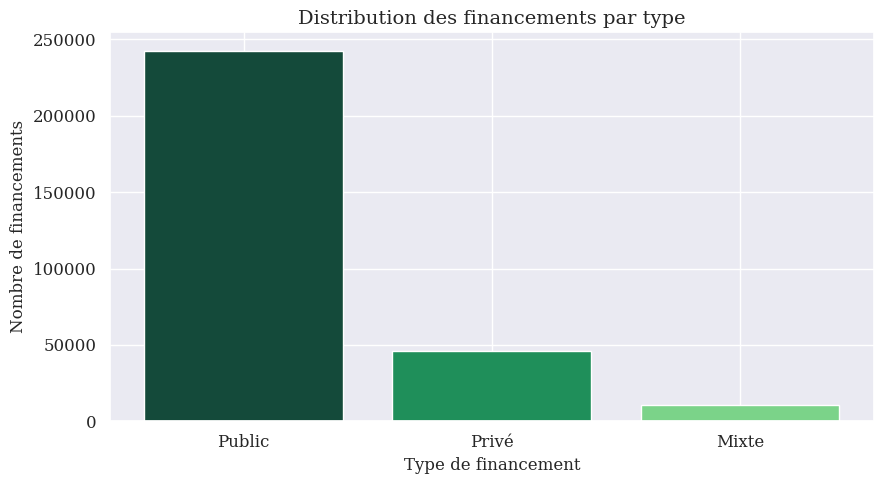

In [77]:
# Comptage total des financements par type
counts = {
    "Public": df["funding_public"].sum(),
    "Privé": df["funding_private"].sum(),
    "Mixte": df["funding_mix"].sum()
}

# Plot
plt.figure(figsize=(9, 5))
plt.bar(
    counts.keys(),
    counts.values(),
    color = ["#144a3a", "#1f8f5a", "#7bd389"]
)

plt.xlabel("Type de financement", fontsize=12)
plt.ylabel("Nombre de financements", fontsize=12)
plt.title("Distribution des financements par type", fontsize=14)

plt.tight_layout()
plt.show()

### C. Visualisation

In [47]:
df_funded_types = df[['year_numeric', 'funding_public', 'funding_private', 'funding_mix']].dropna().copy()

In [48]:
# 2. Group by Year and Sum the counts
# This gives us the total number of Public, Private, and Mix citations per year
yearly_counts = df_funded_types.groupby('year_numeric').sum()

In [49]:
# 3. Calculate Proportions (Normalize to 100%)
# Divide each row by its total to get the percentage share
yearly_props = yearly_counts.div(yearly_counts.sum(axis=1), axis=0)

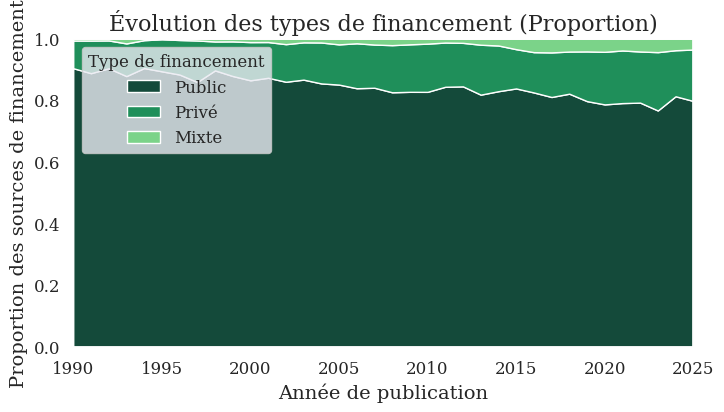

In [50]:
plt.figure(figsize=(8, 4))

# Define colors
colors = ["#144a3a", "#1f8f5a", "#7bd389"] # Blue (Public), Orange (Private), Green (Mix)
labels = ['Public', 'Privé', 'Mixte']

# Create the stackplot
plt.stackplot(
    yearly_props.index,
    yearly_props['funding_public'],
    yearly_props['funding_private'],
    yearly_props['funding_mix'],
    labels=labels,
    colors=colors
)

# Formatting
plt.title('Évolution des types de financement (Proportion)')
plt.xlabel('Année de publication')
plt.ylabel('Proportion des sources de financement')
plt.legend(loc='upper left', title='Type de financement')
plt.margins(0, 0) # Removes white space on edges

plt.show()

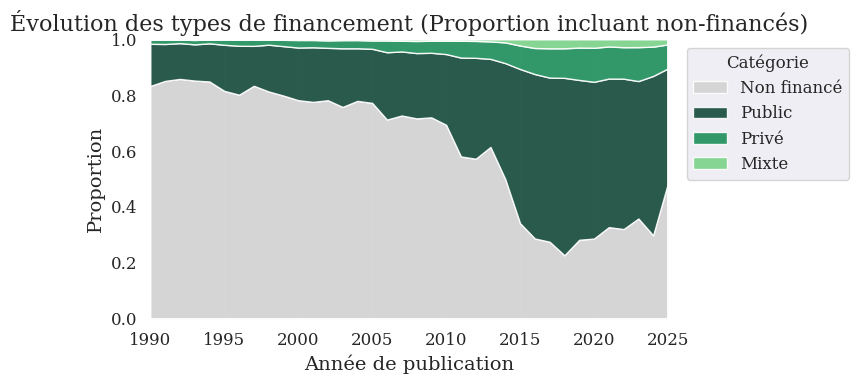

In [51]:
# 1. Aggregate Funding Types (Sums)
# We sum the funding units for the funded papers
yearly_funding = df.groupby('year_numeric')[['funding_public', 'funding_private', 'funding_mix']].sum()

# 2. Count Non-Funded Papers
# We count papers where funders_bin == 0 (Not Funded)
non_funded_counts = df[df['funders_bin'] == 0].groupby('year_numeric').size()

# 3. Combine Data
yearly_data = yearly_funding.copy()
yearly_data['Non-Funded'] = non_funded_counts
yearly_data = yearly_data.fillna(0) # Handle years with no data

# 4. Calculate Proportions (Normalize to 100%)
yearly_props = yearly_data.div(yearly_data.sum(axis=1), axis=0)
yearly_props.index = yearly_props.index.astype(int) # clean x-axis labels

# 5. Plotting
plt.figure(figsize=(8, 4))

# Define order and colors
# We put 'Non-Funded' at the bottom (first argument)
labels = ['Non financé', 'Public', 'Privé', 'Mixte']
colors = ['#d3d3d3', "#144a3a", "#1f8f5a", "#7bd389"] # Grey + Your Green Palette

plt.stackplot(
    yearly_props.index,
    yearly_props['Non-Funded'],
    yearly_props['funding_public'],
    yearly_props['funding_private'],
    yearly_props['funding_mix'],
    labels=labels,
    colors=colors,
    alpha=0.9
)

# Formatting
plt.title('Évolution des types de financement (Proportion incluant non-financés)')
plt.xlabel('Année de publication')
plt.ylabel('Proportion')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), title='Catégorie')
plt.margins(0, 0)
plt.grid(axis='y', linestyle=':', alpha=0.3)

plt.tight_layout()
plt.show()

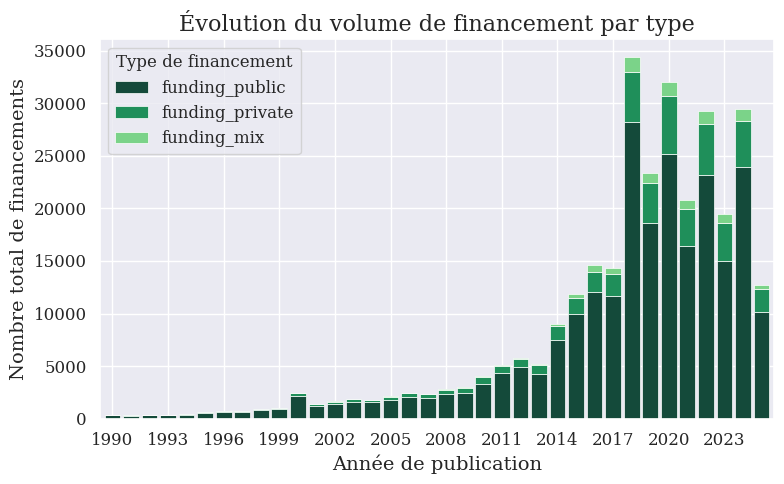

In [52]:
# 2. Prepare Data
cols_to_plot = ['funding_public', 'funding_private', 'funding_mix']
df_yearly_counts = df.groupby('year_numeric')[cols_to_plot].sum()

# Fix: Convert index to integer to remove ".0"
df_yearly_counts.index = df_yearly_counts.index.astype(int)

# 3. Plotting
ax = df_yearly_counts.plot(
    kind='bar', 
    stacked=True, 
    figsize=(8, 5),
    color=["#144a3a", "#1f8f5a", "#7bd389"], 
    width=0.85,
    edgecolor='white',
    linewidth=0.5
)

# 4. Formatting the X-Axis (The Fix)
# Since pandas bar plots treat the X-axis as categorical (0, 1, 2...), 
# we need to manually pick which labels to show.

# Let's aim for roughly 10-15 ticks max to keep it clean
n = len(df_yearly_counts)
step = max(1, n // 10)  # Show label every 'step' years

# Create list of positions (0, step, 2*step...) and labels (2000, 2005...)
tick_positions = range(0, n, step)
tick_labels = [df_yearly_counts.index[i] for i in tick_positions]

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=0)

plt.title('Évolution du volume de financement par type')
plt.xlabel('Année de publication')
plt.ylabel('Nombre total de financements')
plt.legend(title='Type de financement', loc='upper left')

plt.tight_layout()
plt.show()

## 6. Occidental funding

In [53]:
occidental_countries = [
    'country_Australia',
    'country_Austria',
    'country_Belgium',
    'country_Canada',
    'country_Denmark',
    'country_European Union',
    'country_Finland',
    'country_France',
    'country_Germany',
    'country_Greece',
    'country_Iceland',
    'country_Ireland',
    'country_Israel',
    'country_Italy',
    'country_Luxembourg',
    'country_Monaco',
    'country_Netherlands',
    'country_New Zealand',
    'country_Norway',
    'country_Portugal',
    'country_Spain',
    'country_Sweden',
    'country_Switzerland',
    'country_United Kingdom',
    'country_United States'
]

non_occidental_countries = [
    'country_Algeria',
    'country_Argentina',
    'country_Azerbaijan',
    'country_Bahrain',
    'country_Bangladesh',
    'country_Belarus',
    'country_Bosnia and Herzegovina',
    'country_Botswana',
    'country_Brazil',
    'country_Bulgaria',
    'country_Chile',
    'country_China',
    'country_Colombia',
    'country_Costa Rica',
    'country_Croatia',
    'country_Cuba',
    'country_Cyprus',
    'country_Czech Republic',
    'country_Ecuador',
    'country_Egypt',
    'country_Estonia',
    'country_Ethiopia',
    'country_Gabon',
    'country_Georgia',
    'country_Ghana',
    'country_Guatemala',
    'country_Hong Kong',
    'country_Hungary',
    'country_India',
    'country_Indonesia',
    'country_International',
    'country_Iran',
    'country_Iraq',
    'country_Ivory Coast',
    'country_Japan', # Often considered separate in "West vs Rest" comparisons despite being developed
    'country_Jordan',
    'country_Kenya',
    'country_Kuwait',
    'country_Latvia',
    'country_Lebanon',
    'country_Macau',
    'country_Malaysia',
    'country_Mexico',
    'country_Morocco',
    'country_Mozambique',
    'country_Nepal',
    'country_Nigeria',
    'country_Pakistan',
    'country_Panama',
    'country_Paraguay',
    'country_Peru',
    'country_Philippines',
    'country_Poland',
    'country_Qatar',
    'country_Romania',
    'country_Russia',
    'country_Saudi Arabia',
    'country_Senegal',
    'country_Serbia',
    'country_Singapore',
    'country_Slovakia',
    'country_Slovenia',
    'country_South Africa',
    'country_South Korea',
    'country_Syria',
    'country_Taiwan',
    'country_Thailand',
    'country_Tunisia',
    'country_Turkey',
    'country_Ukraine',
    'country_United Arab Emirates',
    'country_Uruguay',
    'country_Venezuela',
    'country_Vietnam'
]

In [54]:
# 1. Sum the dummy columns for each group
# We use .reindex to ensure we only sum columns that actually exist in the dataframe 
# (avoids errors if a country has 0 papers and the column wasn't created)
cols_occ = [c for c in occidental_countries if c in df.columns]
cols_non_occ = [c for c in non_occidental_countries if c in df.columns]

df['total_occidental'] = df[cols_occ].sum(axis=1)
df['total_non_occidental'] = df[cols_non_occ].sum(axis=1)

# 2. Group by Year
# We sum the number of funding instances per group per year
geo_counts = df.groupby('year_numeric')[['total_occidental', 'total_non_occidental']].sum()

# Fix x-axis: convert index to int
geo_counts.index = geo_counts.index.astype(int)

print(geo_counts.head())

C:\Users\lucil\AppData\Local\Temp\ipykernel_25420\2326794553.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['total_occidental'] = df[cols_occ].sum(axis=1)


              total_occidental  total_non_occidental
year_numeric                                        
1990                     156.0                   8.0
1991                     135.0                   9.0
1992                     131.0                   8.0
1993                     170.0                   7.0
1994                     158.0                  14.0


C:\Users\lucil\AppData\Local\Temp\ipykernel_25420\2326794553.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['total_non_occidental'] = df[cols_non_occ].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

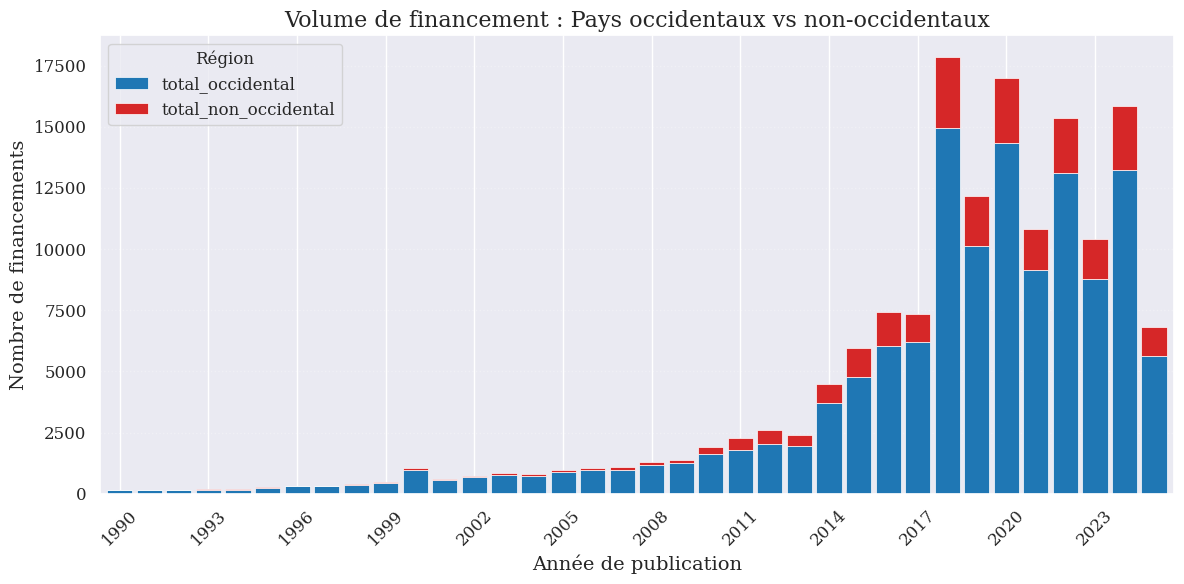

In [55]:
plt.figure(figsize=(12, 6))

colors = ['#1f77b4', '#d62728'] # Blue (Occidental), Red (Non-Occidental)

ax = geo_counts.plot(
    kind='bar', 
    stacked=True, 
    color=colors,
    figsize=(12, 6),
    width=0.85,
    edgecolor='white',
    linewidth=0.5
)

# X-Axis Formatting (Limit ticks)
n = len(geo_counts)
step = max(1, n // 10)
tick_positions = range(0, n, step)
tick_labels = [geo_counts.index[i] for i in tick_positions]

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45)

plt.title('Volume de financement : Pays occidentaux vs non-occidentaux')
plt.xlabel('Année de publication')
plt.ylabel('Nombre de financements')
plt.legend(title='Région')
plt.grid(axis='y', linestyle=':', alpha=0.3)

plt.tight_layout()
plt.show()

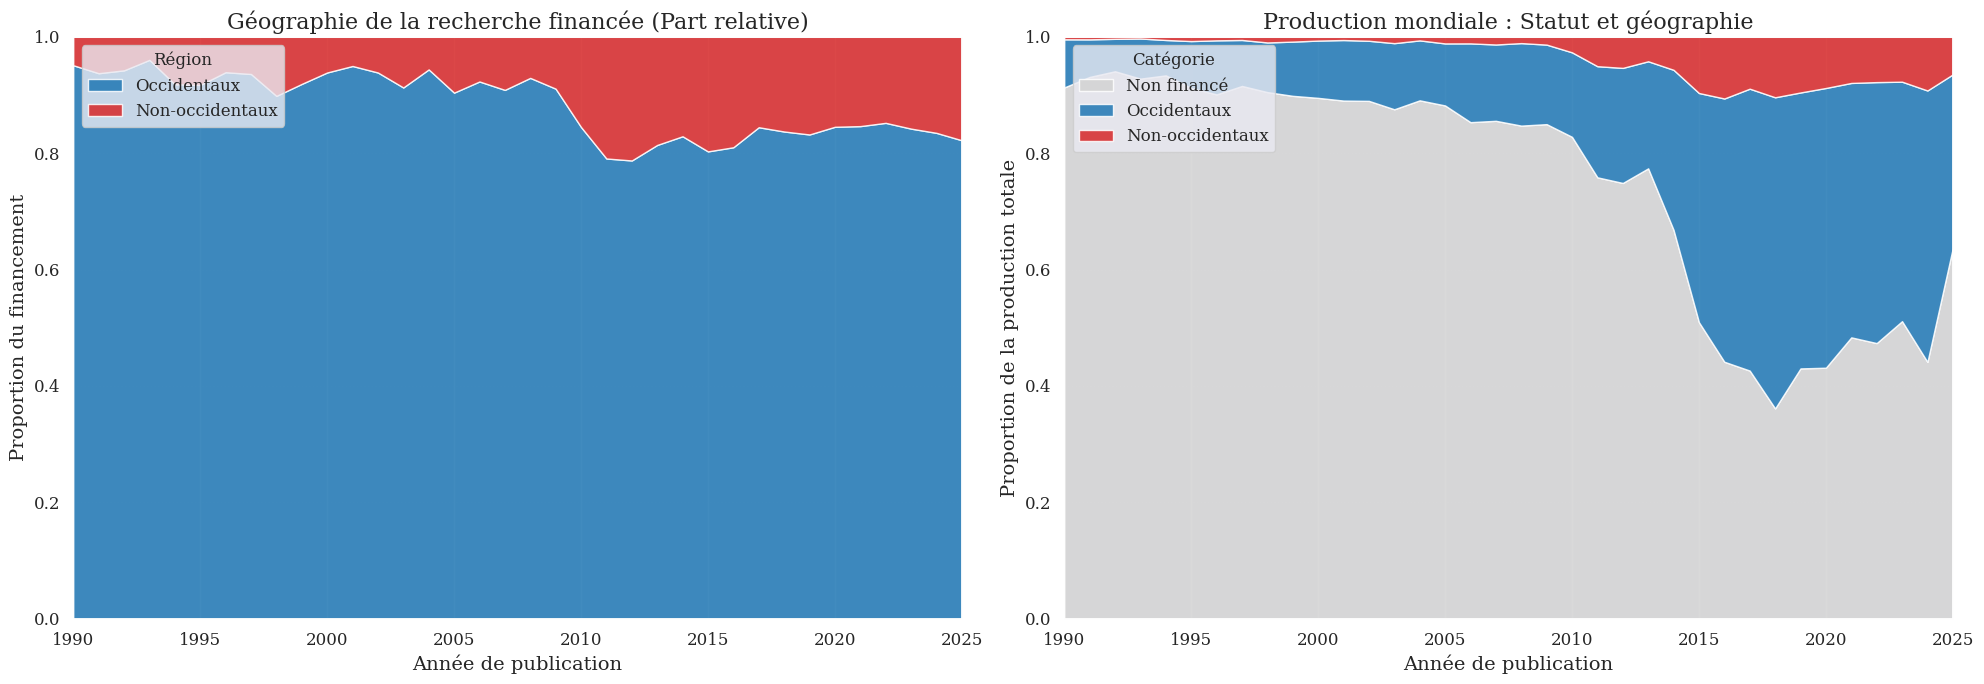

In [56]:
# 1. Prepare Data
# A. Counts for Occidental vs Non-Occidental (Funding Instances)
# (Assuming 'total_occidental' and 'total_non_occidental' exist from previous step)
geo_counts = df.groupby('year_numeric')[['total_occidental', 'total_non_occidental']].sum()

# B. Count Non-Funded Papers (Papers where funders_bin == 0)
non_funded_counts = df[df['funders_bin'] == 0].groupby('year_numeric').size()

# C. Create Combined DataFrame for the second plot
geo_counts_all = geo_counts.copy()
geo_counts_all['Non-Funded'] = non_funded_counts
geo_counts_all = geo_counts_all.fillna(0) # Handle missing years

# 2. Calculate Proportions (100% Stacked)
# Props for Plot 1 (Just Funded)
props_funded = geo_counts.div(geo_counts.sum(axis=1), axis=0)

# Props for Plot 2 (With Non-Funded)
props_all = geo_counts_all.div(geo_counts_all.sum(axis=1), axis=0)

# Ensure integer index for cleaner x-axis
props_funded.index = props_funded.index.astype(int)
props_all.index = props_all.index.astype(int)

# 3. Setup Panel Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# --- Plot 1: Funded Only (Left) ---
labels_1 = ['Occidentaux', 'Non-occidentaux']
colors_1 = ['#1f77b4', '#d62728'] # Blue, Red

axes[0].stackplot(
    props_funded.index,
    props_funded['total_occidental'],
    props_funded['total_non_occidental'],
    labels=labels_1,
    colors=colors_1,
    alpha=0.85
)
axes[0].set_title('Géographie de la recherche financée (Part relative)')
axes[0].set_xlabel('Année de publication')
axes[0].set_ylabel('Proportion du financement')
axes[0].legend(loc='upper left', title='Région')
axes[0].margins(0, 0)
axes[0].grid(axis='y', linestyle=':', alpha=0.3)

# --- Plot 2: Including Non-Funded (Right) ---
# Order: Non-Funded (Bottom) -> Occidental -> Non-Occidental
labels_2 = ['Non financé', 'Occidentaux', 'Non-occidentaux']
colors_2 = ['#d3d3d3', '#1f77b4', '#d62728'] # Grey, Blue, Red

axes[1].stackplot(
    props_all.index,
    props_all['Non-Funded'],
    props_all['total_occidental'],
    props_all['total_non_occidental'],
    labels=labels_2,
    colors=colors_2,
    alpha=0.85
)
axes[1].set_title('Production mondiale : Statut et géographie')
axes[1].set_xlabel('Année de publication')
axes[1].set_ylabel('Proportion de la production totale')
axes[1].legend(loc='upper left', title='Catégorie')
axes[1].margins(0, 0)
axes[1].grid(axis='y', linestyle=':', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Funding and influence (FWCI)

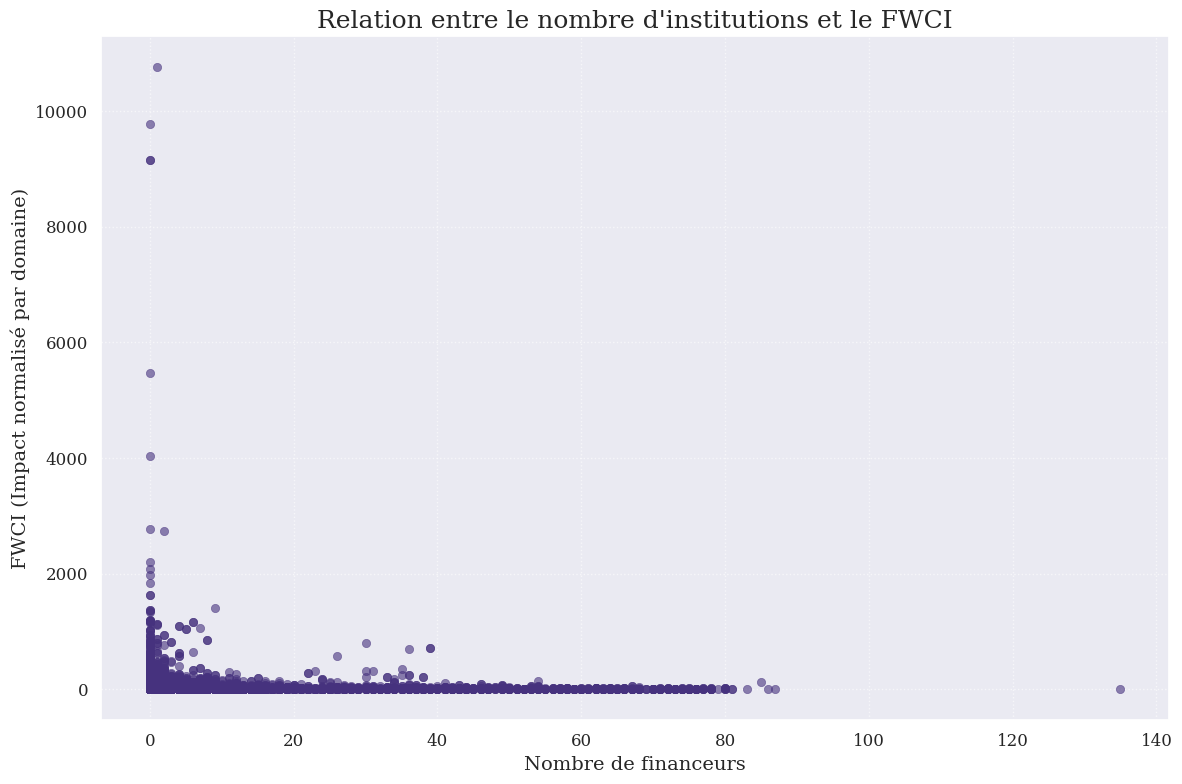

In [57]:
plt.figure(figsize=(12, 8))

# Création du nuage de points
sns.scatterplot(
    data=df, 
    x='funders_count', 
    y='fwci', 
    alpha=0.6,
    edgecolor=None  # Supprime les contours pour plus de clarté
)

# Titres et étiquettes en français
plt.title("Relation entre le nombre d'institutions et le FWCI", fontsize=18)
plt.xlabel("Nombre de financeurs", fontsize=14)
plt.ylabel("FWCI (Impact normalisé par domaine)", fontsize=14)

# Ajout d'une grille pour la lisibilité (déjà géré par le thème, mais on s'assure qu'elle est là)
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

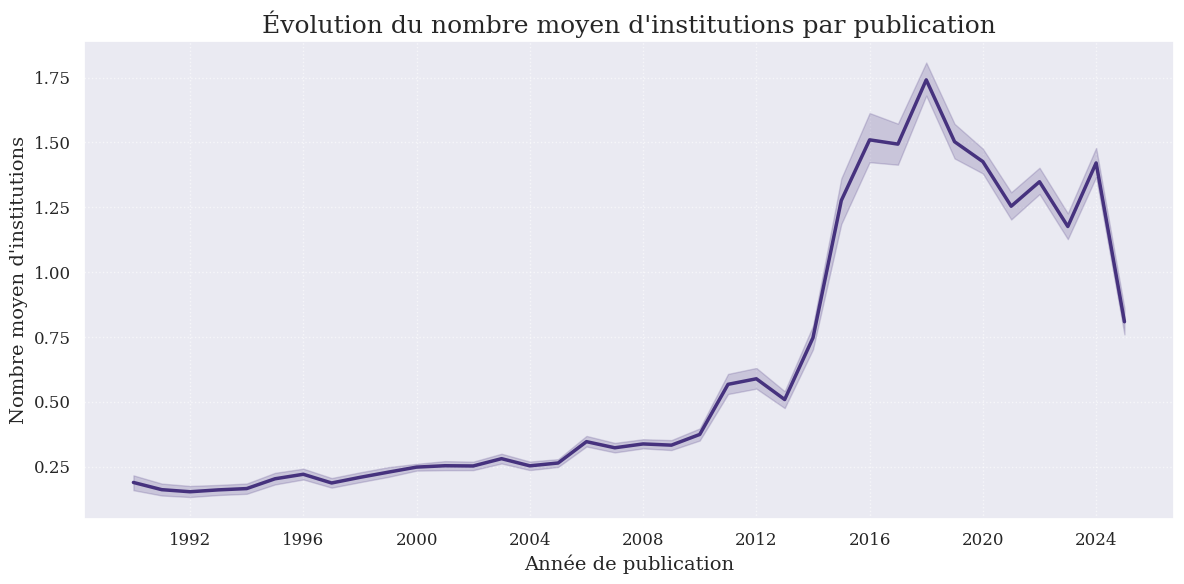

In [58]:
plt.figure(figsize=(12, 6))

# Création du graphique de tendance (Moyenne + Intervalle de confiance)
sns.lineplot(
    data=df, 
    x='year_numeric', 
    y='funders_count',
    linewidth=2.5
)

# Titres et étiquettes en français
plt.title("Évolution du nombre moyen d'institutions par publication", fontsize=18)
plt.xlabel("Année de publication", fontsize=14)
plt.ylabel("Nombre moyen d'institutions", fontsize=14)

# Ajustement de l'axe X pour être plus propre (entiers)
# On récupère les limites actuelles pour définir un pas raisonnable
import matplotlib.ticker as ticker
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

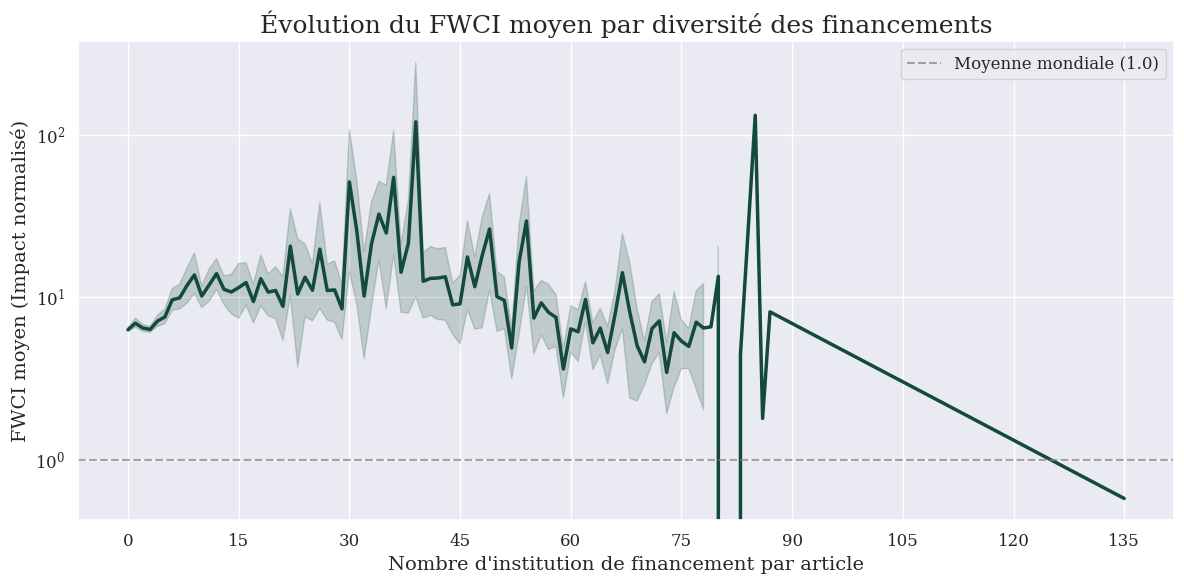

In [73]:
plt.figure(figsize=(12, 6))

# Création du graphique de tendance pour le FWCI
sns.lineplot(
    data=df, 
    x='funders_count', 
    y='fwci',
    linewidth=2.5,
    color='#144a3a' # Une couleur rouge/orange souvent utilisée pour l'impact
)

plt.yscale('log')
# Titres et étiquettes en français
plt.title("Évolution du FWCI moyen par diversité des financements", fontsize=18)
plt.xlabel("Nombre d'institution de financement par article", fontsize=14)
plt.ylabel("FWCI moyen (Impact normalisé)", fontsize=14)

# Ligne de référence à 1.0 (Moyenne mondiale)
plt.axhline(1.0, color='gray', linestyle='--', alpha=0.7, label='Moyenne mondiale (1.0)')
plt.legend()

# Ajustement de l'axe X pour n'avoir que des années entières
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

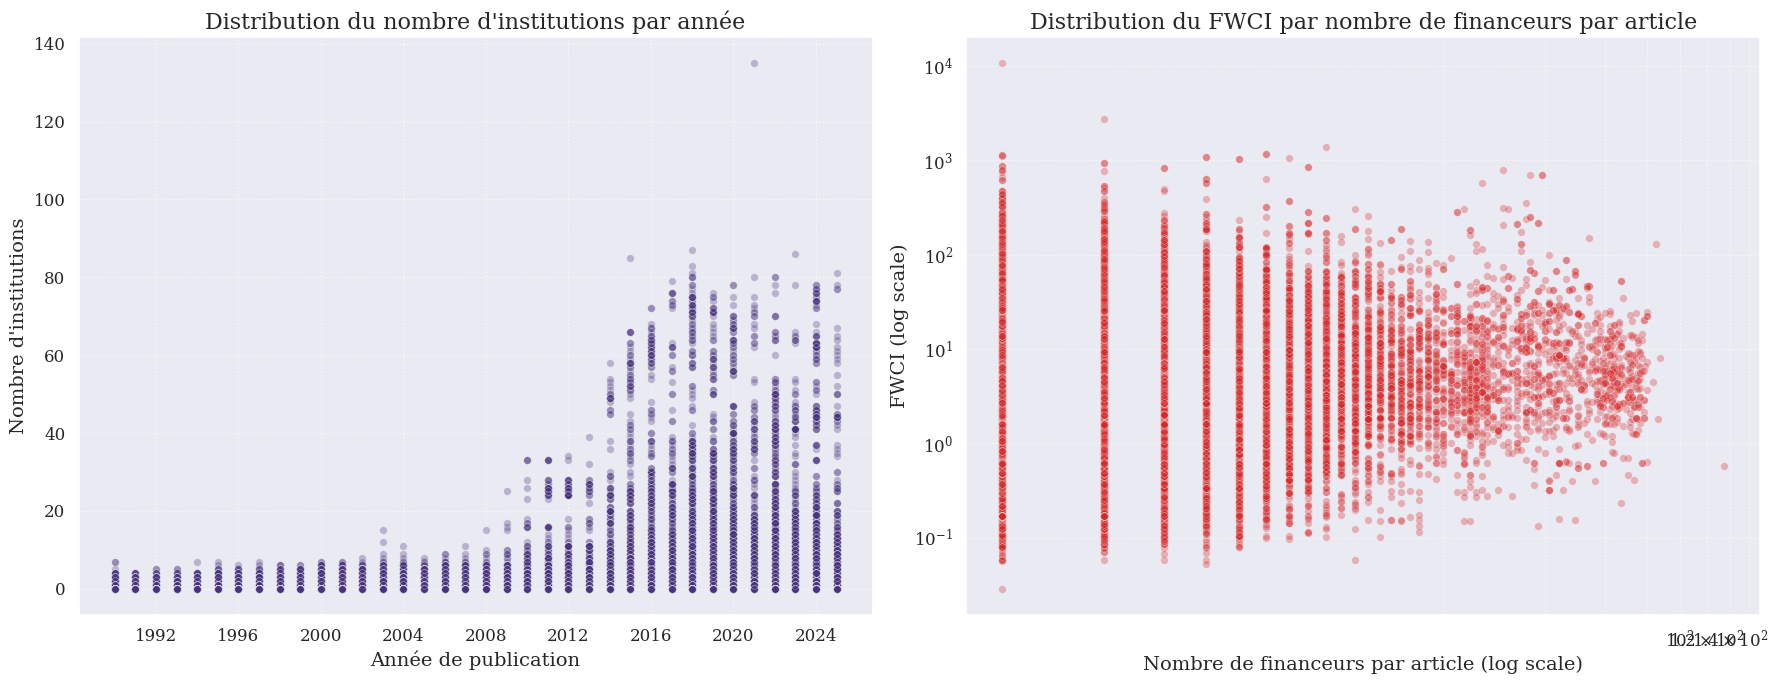

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Graphique 1 : Nombre d'institutions par année ---
sns.scatterplot(
    data=df, 
    x='year_numeric', 
    y='funders_count',
    alpha=0.3,       # Transparence pour voir la densité
    s=30,            # Taille des points
    ax=axes[0]
)

axes[0].set_title("Distribution du nombre d'institutions par année", fontsize=16)
axes[0].set_xlabel("Année de publication", fontsize=14)
axes[0].set_ylabel("Nombre d'institutions", fontsize=14)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True)) # Années entières
axes[0].grid(True, linestyle=':', alpha=0.6)


# --- Graphique 2 : FWCI par année ---
# Note : Le FWCI peut avoir des valeurs extrêmes, le scatter plot permet de bien les repérer
sns.scatterplot(
    data=df, 
    x='funders_count', 
    y='fwci',
    alpha=0.3, 
    color='#d62728', # Rouge pour distinguer du premier graphe
    s=30,
    ax=axes[1]
)
axes[1].set_xscale('log')
axes[1].set_yscale('log')

axes[1].set_title("Distribution du FWCI par nombre de financeurs par article", fontsize=16)
axes[1].set_xlabel("Nombre de financeurs par article (log scale)", fontsize=14)
axes[1].set_ylabel("FWCI (log scale)", fontsize=14)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()